SON KODLAR

In [1]:
import yfinance as yf

import pandas as pd
import numpy as np

from arch import arch_model
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import cramervonmises_2samp

from pmdarima import auto_arima

In [3]:
def acf_pacf_plot(df, lag=45):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
    plot_acf(df, lags=lag, ax=axes[0])  
    plot_pacf(df, lags=lag, ax=axes[1])  
    
    
    axes[0].grid(True)  # ACF plot grid
    axes[1].grid(True)  # PACF plot grid
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

def return_series(series):
    return np.log(series / series.shift(1))

def stock_logreturn(data):
    df = pd.DataFrame()
    df["price"] = data
    df["return"] = return_series(data)
    return df

In [4]:
tickers = ["KC=F","CC=F","KC=F","SB=F","PL=F","HG=F"]



raw_data = yf.download(tickers)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [5]:
data = raw_data["Close"]
start="2020-01-01"
end="2023-12-31"
data = data[start:end].dropna()
data.rename(columns={
    "CC=F": "Cocoa",
    "HG=F": "Copper",
    "KC=F": "Coffee",
    "PL=F": "Platinum",
    "SB=F": "Sugar"
}, inplace=True)



In [6]:
data

Ticker,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-02,2532.0,2.8330,127.099998,978.599976,13.130000
2020-01-03,2519.0,2.7985,126.349998,984.500000,13.310000
2020-01-06,2484.0,2.8005,122.150002,960.400024,13.730000
2020-01-07,2533.0,2.8040,122.400002,966.000000,13.590000
2020-01-08,2501.0,2.8190,119.150002,959.000000,13.470000
...,...,...,...,...,...
2023-12-22,4311.0,3.8955,192.800003,979.500000,20.620001
2023-12-26,4283.0,3.8955,194.350006,980.099976,20.530001
2023-12-27,4280.0,3.9435,197.750000,1000.099976,20.600000


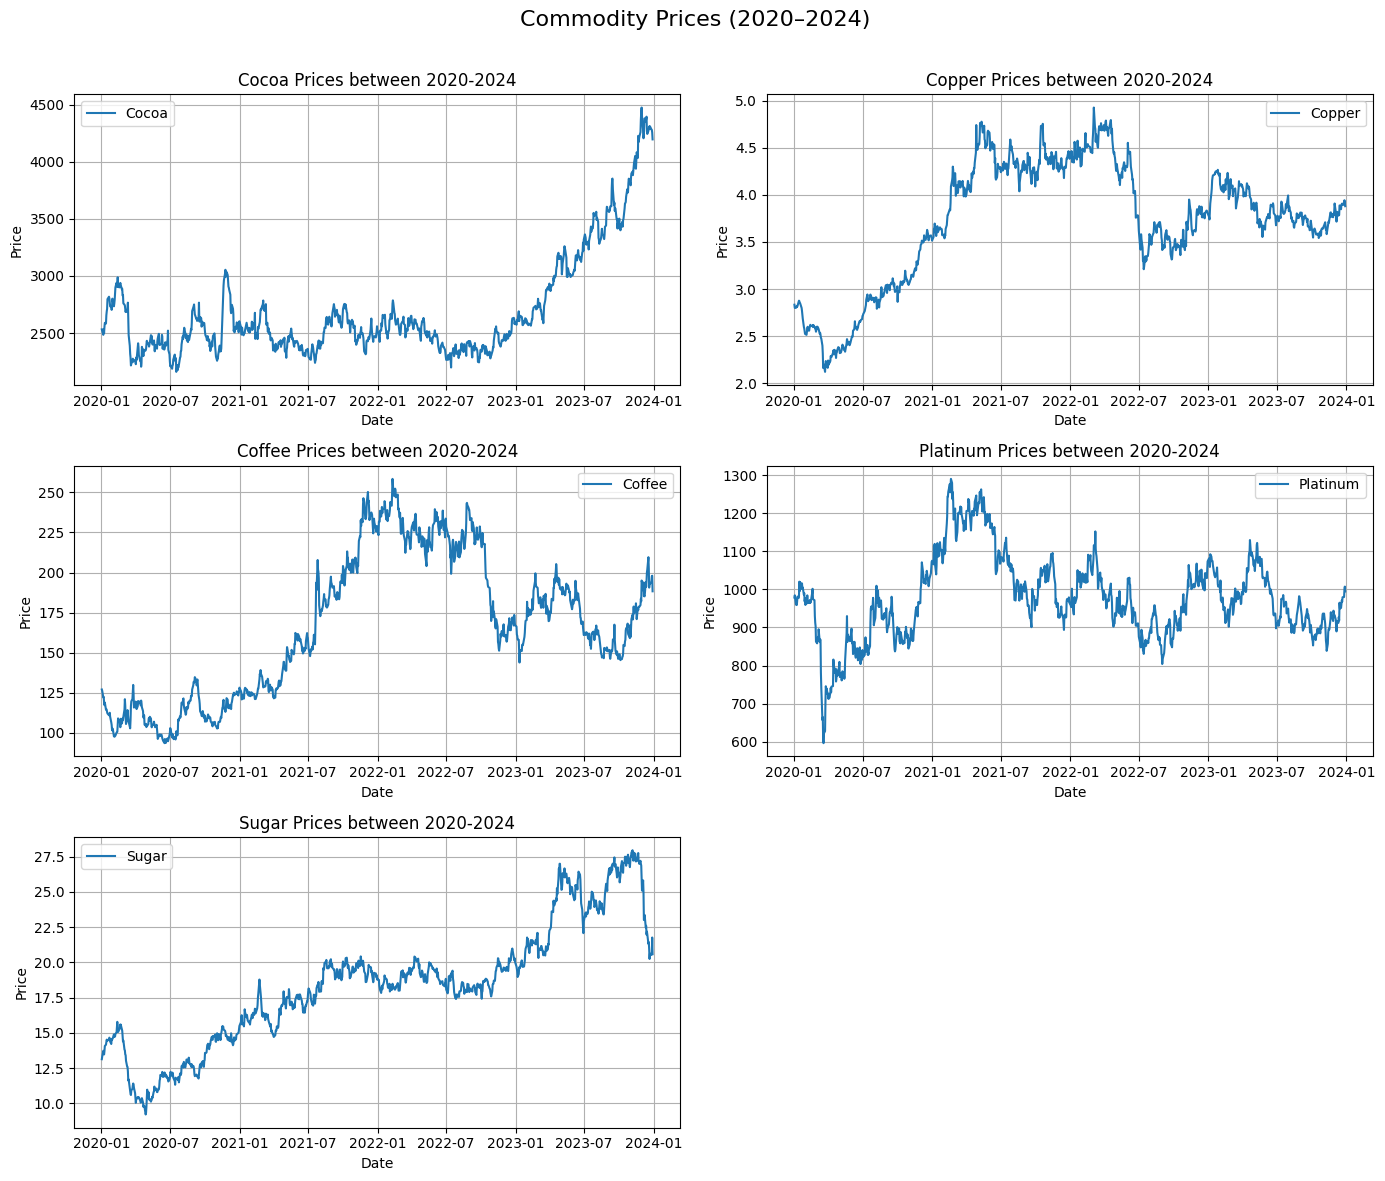

In [7]:
import matplotlib.pyplot as plt

# Sütun adlarını al
cols = data.columns
n = len(cols)

# Kaç satır subplot gerektiğine karar ver (2 sütunlu grid)
rows = (n + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))
axes = axes.flatten()

# Her sütun için ayrı subplot çiz
for i, col in enumerate(cols):
    axes[i].plot(data.index, data[col], label=col, color='tab:blue')
    axes[i].set_title(f"{col} Prices between 2020-2024", fontsize=12)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price")
    axes[i].legend()
    axes[i].grid(True)

# Kullanılmayan subplot varsa sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Genel başlık ekle
fig.suptitle("Commodity Prices (2020–2024)", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Genel başlık için boşluk bırak

# Grafik görselini kaydet
plt.savefig("commodity_prices_2020_2024.png", dpi=300)

plt.show()


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def manual_pacf(series, max_lag):
    series = np.asarray(series)
    pacf_vals = [1.0]  # PACF at lag 0 is always 1

    for lag in range(1, max_lag + 1):
        # Build DataFrame for regression
        y = series[lag:]
        X = np.column_stack([series[lag - i:len(series) - i] for i in range(1, lag + 1)])
        
        model = LinearRegression().fit(X, y)
        pacf_vals.append(model.coef_[-1])  # The coefficient of lag_k is the PACF at lag k

    return pacf_vals


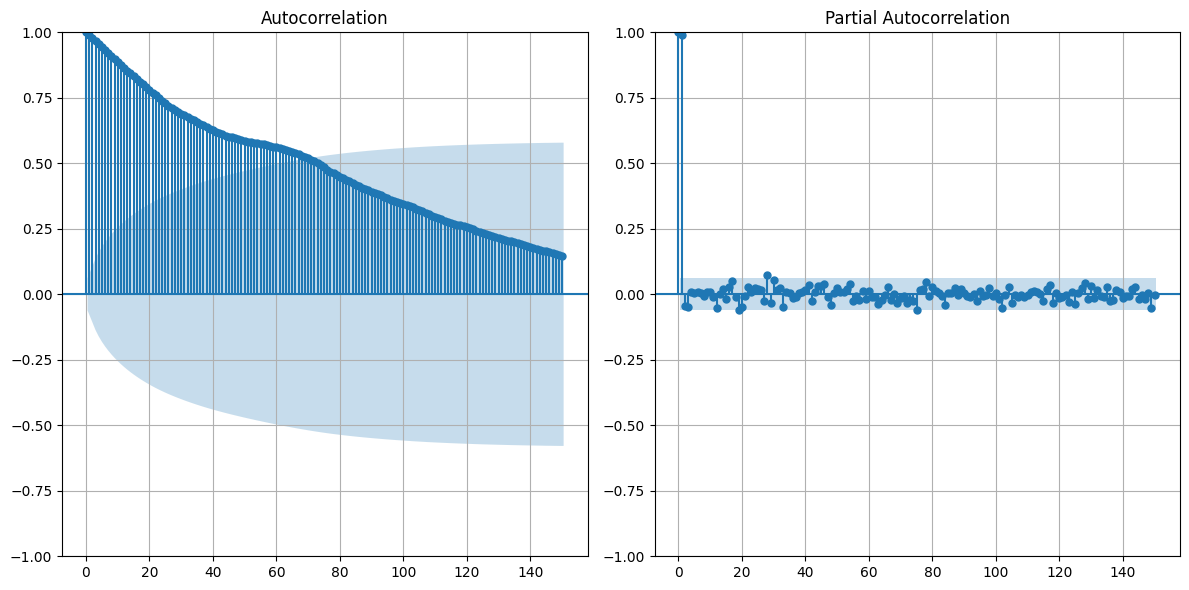

In [9]:
acf_pacf_plot(data["Cocoa"],150)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

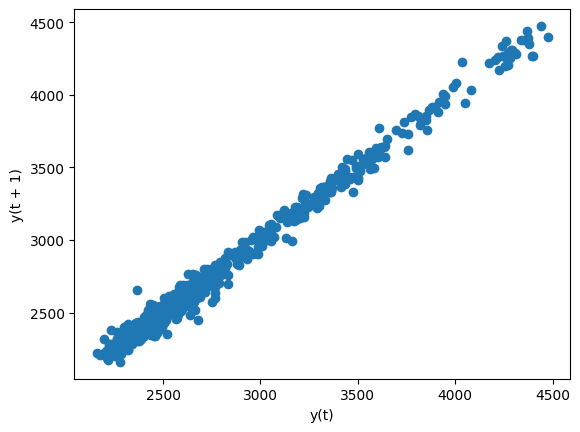

In [10]:
pd.plotting.lag_plot(data["Cocoa"],1)


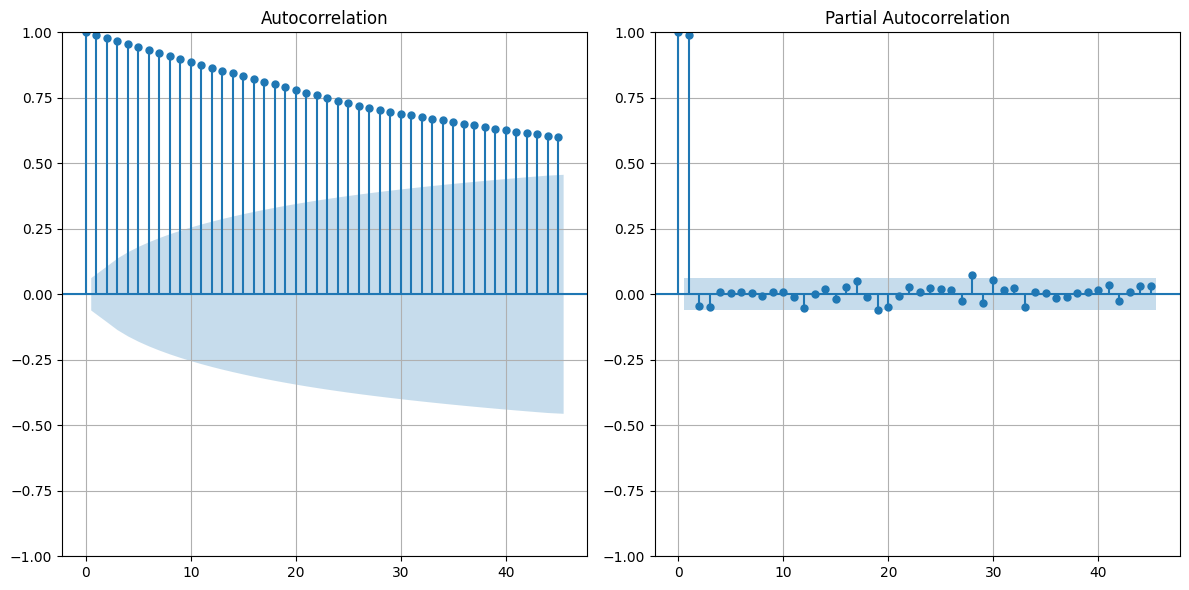

In [11]:
acf_pacf_plot(data["Cocoa"])

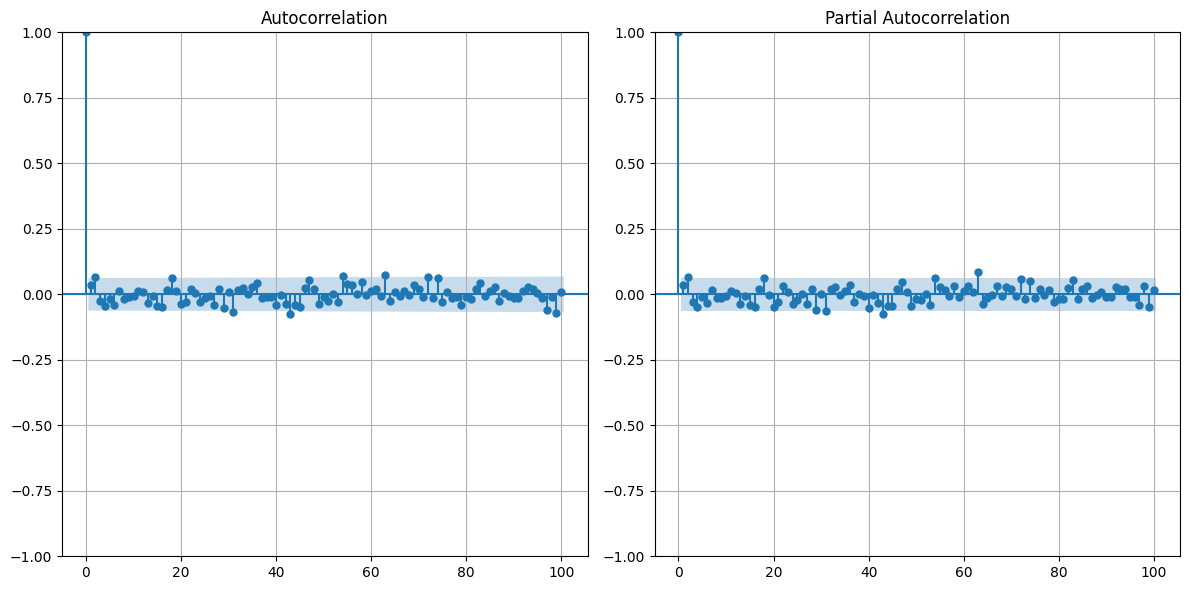

In [12]:
acf_pacf_plot(data["Cocoa"].diff().dropna(),100)

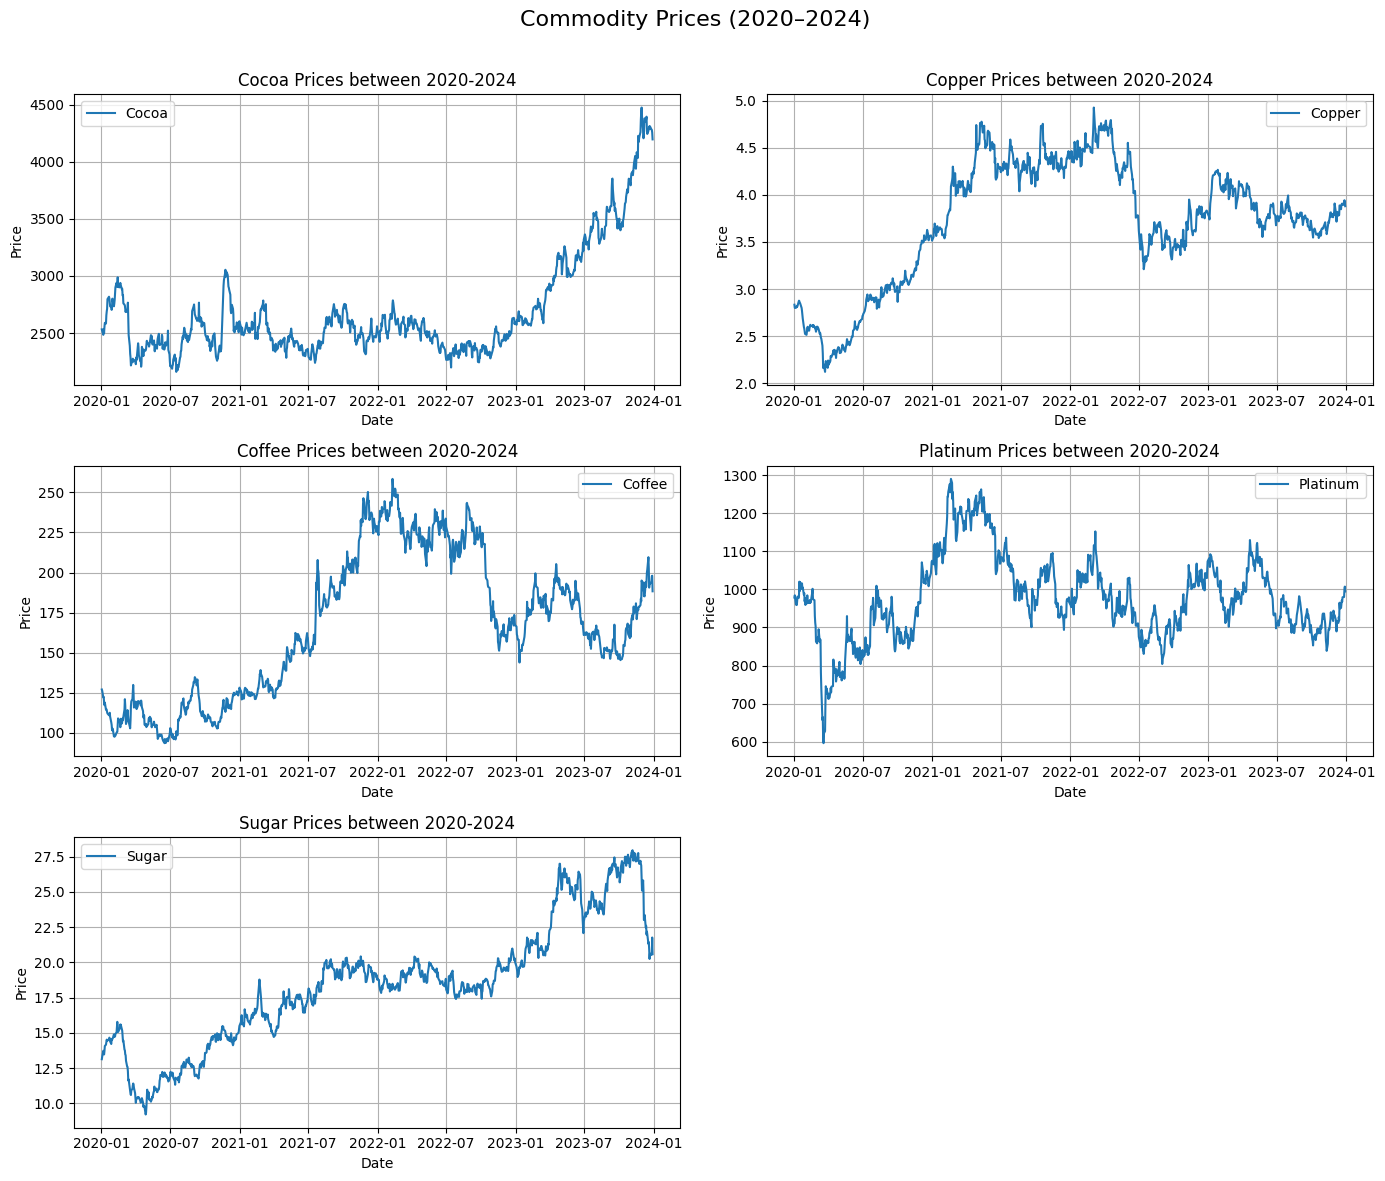

In [15]:
import matplotlib.pyplot as plt


# Sütun adlarını al
cols = data.columns
n = len(cols)

# Kaç satır subplot gerektiğine karar ver (2 sütunlu grid)
rows = (n + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))
axes = axes.flatten()

# Her sütun için ayrı subplot çiz
for i, col in enumerate(cols):
    axes[i].plot(data.index, data[col], label=col, color='tab:blue')
    axes[i].set_title(f"{col} Prices between 2020-2024", fontsize=12)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price")
    axes[i].legend()
    axes[i].grid(True)

# Kullanılmayan subplot varsa sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Genel başlık ekle
fig.suptitle("Commodity Prices (2020–2024)", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Genel başlık için boşluk bırak
plt.show()


In [16]:
data.diff().dropna()

Ticker,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-03,-13.0,-0.0345,-0.750000,5.900024,0.180000
2020-01-06,-35.0,0.0020,-4.199997,-24.099976,0.419999
2020-01-07,49.0,0.0035,0.250000,5.599976,-0.139999
2020-01-08,-32.0,0.0150,-3.250000,-7.000000,-0.120000
2020-01-09,53.0,-0.0085,-1.800003,8.099976,0.240000
...,...,...,...,...,...
2023-12-22,23.0,-0.0130,-0.800003,11.900024,0.380001
2023-12-26,-28.0,0.0000,1.550003,0.599976,-0.090000
2023-12-27,-3.0,0.0480,3.399994,20.000000,0.070000


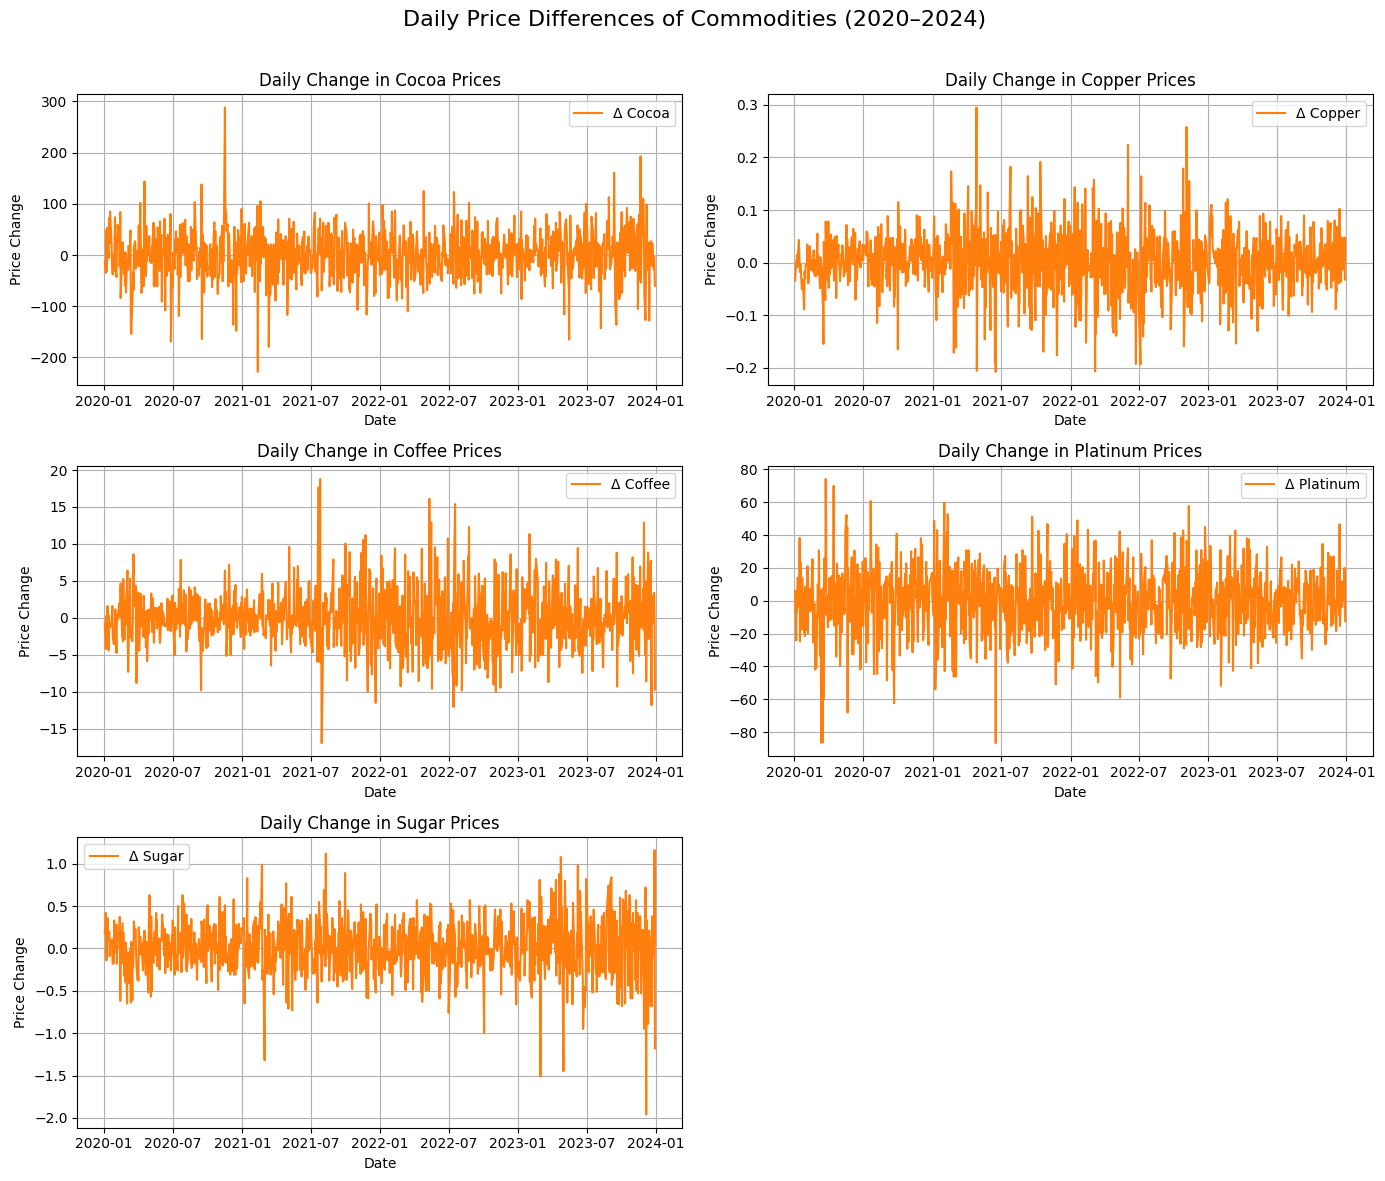

In [17]:
import matplotlib.pyplot as plt

# Fark serisini hesapla (1. fark)
diff_data = data.diff().dropna()  # İlk satır NaN olur, o yüzden dropna

# Sütun adlarını al
cols = diff_data.columns
n = len(cols)
rows = (n + 1) // 2  # 2 sütunlu subplot grid için gereken satır

# Grafik ayarları
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))
axes = axes.flatten()

# Her sütun için fark serisini çiz
for i, col in enumerate(cols):
    axes[i].plot(diff_data.index, diff_data[col], label=f"Δ {col}", color='tab:orange')
    axes[i].set_title(f"Daily Change in {col} Prices", fontsize=12)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price Change")
    axes[i].legend()
    axes[i].grid(True)

# Kullanılmayan eksenleri sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Genel başlık
fig.suptitle("Daily Price Differences of Commodities (2020–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Görseli kaydet
plt.savefig("daily_price_diff_2020_2024.png", dpi=300)

plt.show()


import matplotlib.pyplot as plt

# Fark serisini hesapla (1. fark)
diff_data = data.diff().dropna()  # İlk satır NaN olur, o yüzden dropna

# Sütun adlarını al
cols = diff_data.columns
n = len(cols)
rows = (n + 1) // 2  # 2 sütunlu subplot grid için gereken satır

# Grafik ayarları
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))
axes = axes.flatten()

# Her sütun için fark serisini çiz
for i, col in enumerate(cols):
    axes[i].plot(diff_data.index, diff_data[col], label=f"Δ {col}", color='tab:orange')
    axes[i].set_title(f"Daily Change in {col} Prices", fontsize=12)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price Change")
    axes[i].legend()
    axes[i].grid(True)

# Kullanılmayan eksenleri sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Genel başlık
fig.suptitle("Daily Price Differences of Commodities (2020–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

def adf_stationary(p):
    return "Stationary" if p < 0.05 else "Non-Stationary"

def kpss_stationary(p):
    # KPSS testinde H0: durağan, H1: durağan değil
    return "Stationary" if p > 0.05 else "Non-Stationary"

def pp_stationary(p):
    return "Stationary" if p < 0.05 else "Non-Stationary"


def stationary_test(data):
    results = []
    for col in diff_data.columns:
        series = diff_data[col].dropna()
        
        # ADF testi
        adf_res = adfuller(series)
        adf_p = adf_res[1]
        
        # KPSS testi
        try:
            kpss_res = kpss(series, regression='c', nlags=10)
            kpss_p = kpss_res[1]
        except:
            kpss_p = None
        
        # Phillips-Perron testi
        try:
            pp_res = PhillipsPerron(series)
            pp_p = pp_res.pvalue
        except:
            pp_p = None
        
        results.append({
            "Series": col,
            "ADF Statistic": adf_res[0],
            "ADF p-value": adf_p,
            "ADF Result": adf_stationary(adf_p),
            "KPSS Statistic": kpss_res[0] if kpss_p is not None else None,
            "KPSS p-value": kpss_p,
            "KPSS Result": kpss_stationary(kpss_p) if kpss_p is not None else "N/A",
            "PP Statistic": pp_res.stat if pp_p is not None else None,
            "PP p-value": pp_p,
            "PP Result": pp_stationary(pp_p) if pp_p is not None else "N/A"
        })
    
    results_df = pd.DataFrame(results)
    return results_df


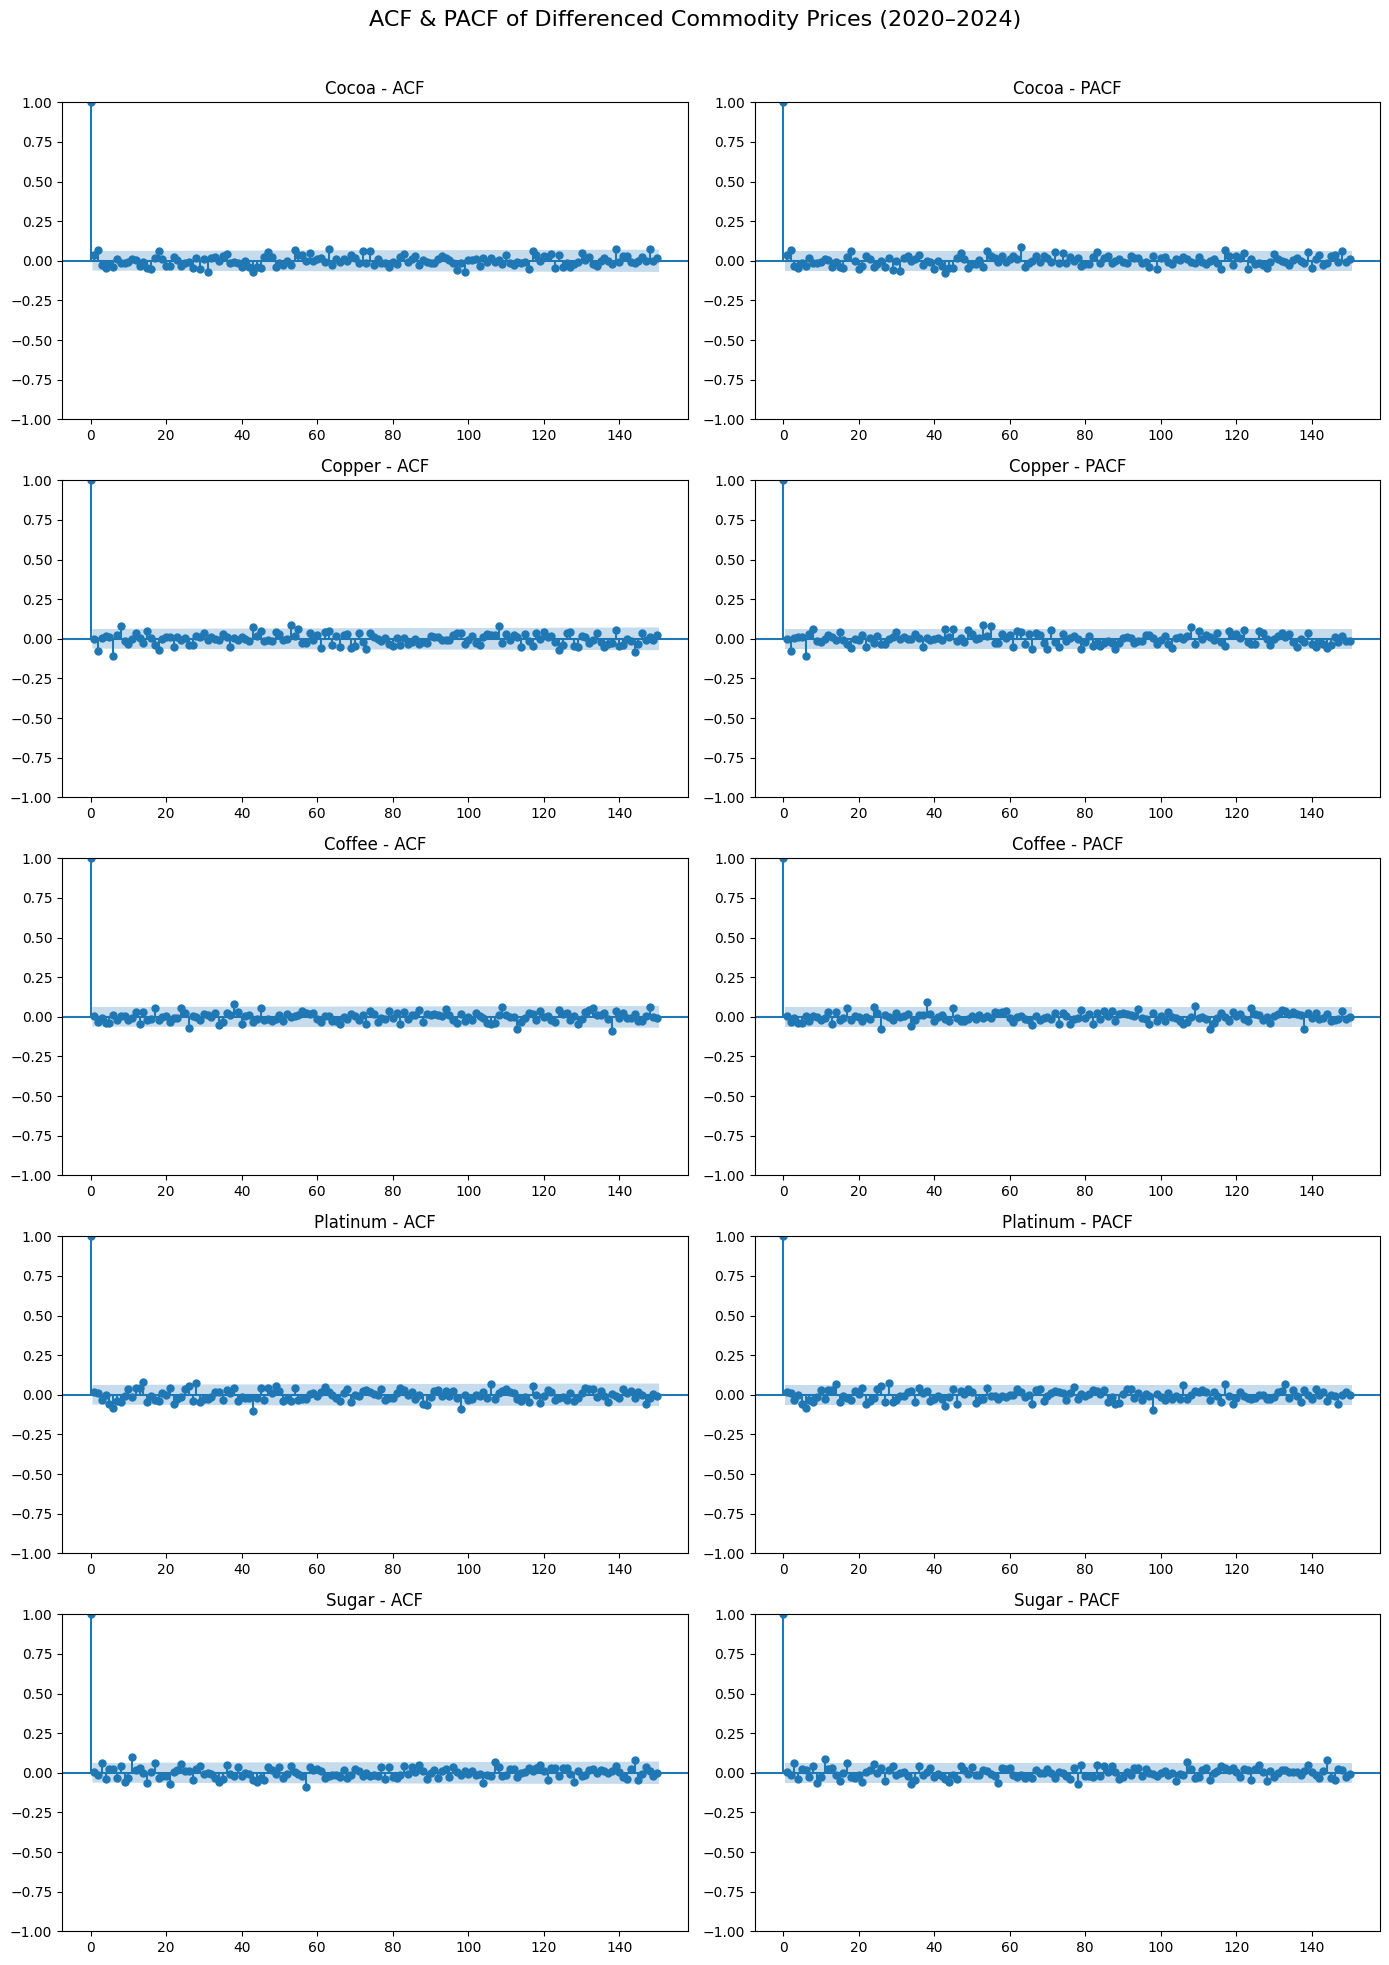

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tüm fark serilerini al
diff_data = data.diff().dropna()

# Kaç değişken var
n = len(diff_data.columns)

# Grafik alanı: her satır 1 değişken için, 2 sütun (ACF & PACF)
fig, axes = plt.subplots(n, 2, figsize=(14, 4 * n))

# Eğer sadece 1 değişken varsa axes 1D array olur, 2D yapalım
if n == 1:
    axes = [axes]

# Her değişken için ACF ve PACF çiz
for i, column in enumerate(diff_data.columns):
    plot_acf(diff_data[column], ax=axes[i][0], lags=150)
    axes[i][0].set_title(f"{column} - ACF")

    plot_pacf(diff_data[column], ax=axes[i][1], lags=150, method='ywm')
    axes[i][1].set_title(f"{column} - PACF")

# Genel başlık
fig.suptitle("ACF & PACF of Differenced Commodity Prices (2020–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Kaydet
plt.savefig("combined_acf_pacf.png", dpi=300)

plt.show()


In [20]:
import pandas as pd
from pmdarima import auto_arima

results = []
residuals_dict = {}

for col in data.columns:
    series = data[col].dropna()
    
    model = auto_arima(series, d=1, seasonal=False, stepwise=True, suppress_warnings=True)
    
    arima_order = model.order
    arima_str = f"ARIMA{arima_order}"
    
    # Model özeti
    results.append({
        'Series': col,
        'Model': arima_str,
        'AIC': model.aic(),
        'BIC': model.bic(),
        'HQIC': model.hqic()
    })
    
    # Artıklar (residuals)
    residuals = pd.Series(model.resid())  # align with original dates
    residuals_dict[col] = residuals

# Model özetlerini DataFrame olarak
model_results_df = pd.DataFrame(results)

# Artık değerleri tek bir DataFrame olarak
residuals_df = pd.DataFrame(residuals_dict)

# Çıktı
print(model_results_df)
print(residuals_df.head())


     Series           Model           AIC           BIC          HQIC
0     Cocoa  ARIMA(0, 1, 0)  10569.229791  10574.142534  10571.096524
1    Copper  ARIMA(2, 1, 2)  -2847.241317  -2822.677602  -2837.907652
2    Coffee  ARIMA(0, 1, 0)   5614.033264   5618.946007   5615.899997
3  Platinum  ARIMA(0, 1, 0)   8889.562606   8894.475349   8891.429339
4     Sugar  ARIMA(2, 1, 3)    597.398625    626.875082    608.599023
             Cocoa    Copper      Coffee    Platinum      Sugar
Date                                                           
2020-01-02  2532.0  2.833000  127.099998  978.599976  13.130000
2020-01-03   -13.0 -0.034500   -0.750000    5.900024   0.180000
2020-01-06   -35.0  0.001968   -4.199997  -24.099976   0.418784
2020-01-07    49.0  0.000938    0.250000    5.599976  -0.142073
2020-01-08   -32.0  0.015274   -3.250000   -7.000000  -0.126641


In [21]:
residuals_df

,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-02,2532.0,2.833000,127.099998,978.599976,13.130000
2020-01-03,-13.0,-0.034500,-0.750000,5.900024,0.180000
2020-01-06,-35.0,0.001968,-4.199997,-24.099976,0.418784
2020-01-07,49.0,0.000938,0.250000,5.599976,-0.142073
2020-01-08,-32.0,0.015274,-3.250000,-7.000000,-0.126641
...,...,...,...,...,...
2023-12-22,23.0,-0.008859,-0.800003,11.900024,0.212915
2023-12-26,-28.0,-0.008414,1.550003,0.599976,-0.000702
2023-12-27,-3.0,0.044112,3.399994,20.000000,0.142129


In [22]:
residuals_df = residuals_df[1:]

In [23]:
residuals_df

,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-03,-13.0,-0.034500,-0.750000,5.900024,0.180000
2020-01-06,-35.0,0.001968,-4.199997,-24.099976,0.418784
2020-01-07,49.0,0.000938,0.250000,5.599976,-0.142073
2020-01-08,-32.0,0.015274,-3.250000,-7.000000,-0.126641
2020-01-09,53.0,-0.006159,-1.800003,8.099976,0.229280
...,...,...,...,...,...
2023-12-22,23.0,-0.008859,-0.800003,11.900024,0.212915
2023-12-26,-28.0,-0.008414,1.550003,0.599976,-0.000702
2023-12-27,-3.0,0.044112,3.399994,20.000000,0.142129


In [24]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qq(residuals, title='Q-Q Plot'):
    """
    Verilen artıklara (residuals) Q-Q plot çizer.

    Parameters:
        residuals (pd.Series): Artıklar
        title (str): Başlık
    """
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals.dropna(), dist='t',sparams=(5,), plot=plt)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [25]:
data

Ticker,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-02,2532.0,2.8330,127.099998,978.599976,13.130000
2020-01-03,2519.0,2.7985,126.349998,984.500000,13.310000
2020-01-06,2484.0,2.8005,122.150002,960.400024,13.730000
2020-01-07,2533.0,2.8040,122.400002,966.000000,13.590000
2020-01-08,2501.0,2.8190,119.150002,959.000000,13.470000
...,...,...,...,...,...
2023-12-22,4311.0,3.8955,192.800003,979.500000,20.620001
2023-12-26,4283.0,3.8955,194.350006,980.099976,20.530001
2023-12-27,4280.0,3.9435,197.750000,1000.099976,20.600000


ARCH//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////




In [26]:
data

Ticker,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-02,2532.0,2.8330,127.099998,978.599976,13.130000
2020-01-03,2519.0,2.7985,126.349998,984.500000,13.310000
2020-01-06,2484.0,2.8005,122.150002,960.400024,13.730000
2020-01-07,2533.0,2.8040,122.400002,966.000000,13.590000
2020-01-08,2501.0,2.8190,119.150002,959.000000,13.470000
...,...,...,...,...,...
2023-12-22,4311.0,3.8955,192.800003,979.500000,20.620001
2023-12-26,4283.0,3.8955,194.350006,980.099976,20.530001
2023-12-27,4280.0,3.9435,197.750000,1000.099976,20.600000


In [27]:
log_returns = np.log(data / data.shift(1)).dropna()
log_returns

Ticker,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-03,-0.005148,-0.012253,-0.005918,0.006011,0.013616
2020-01-06,-0.013992,0.000714,-0.033806,-0.024784,0.031068
2020-01-07,0.019534,0.001249,0.002045,0.005814,-0.010249
2020-01-08,-0.012714,0.005335,-0.026911,-0.007273,-0.008869
2020-01-09,0.020970,-0.003020,-0.015222,0.008411,0.017660
...,...,...,...,...,...
2023-12-22,0.005349,-0.003332,-0.004141,0.012223,0.018601
2023-12-26,-0.006516,0.000000,0.008007,0.000612,-0.004374
2023-12-27,-0.000701,0.012247,0.017343,0.020201,0.003404


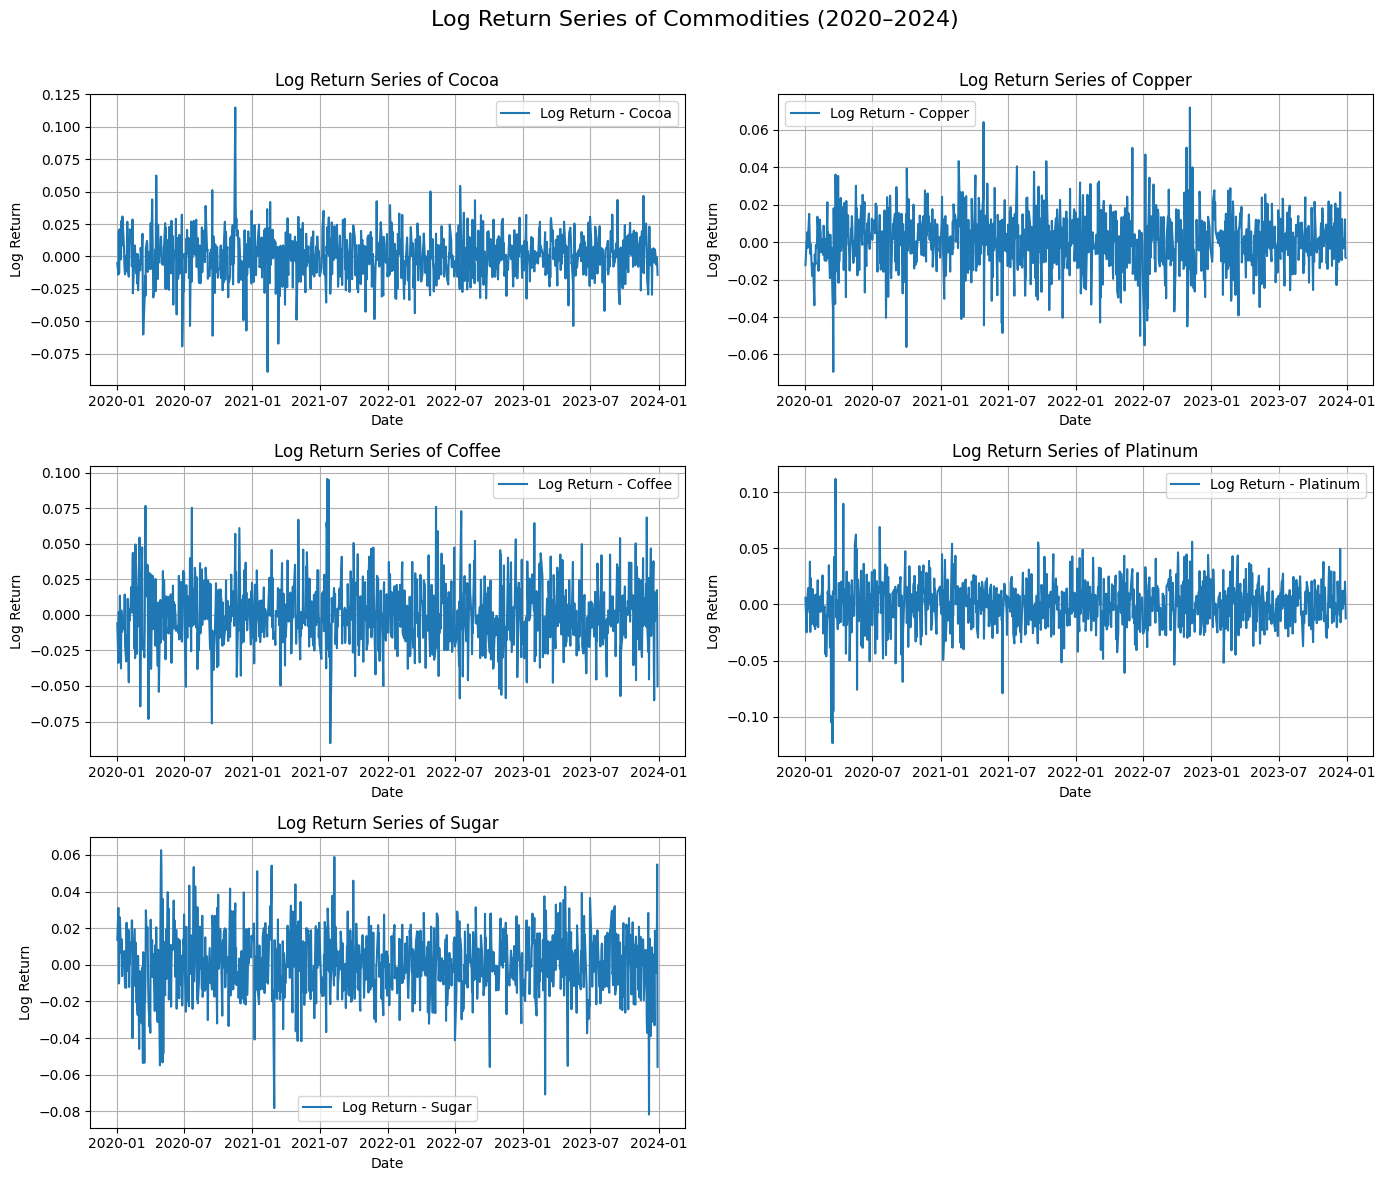

In [28]:
import matplotlib.pyplot as plt

cols = log_returns.columns
n = len(cols)
rows = (n + 1) // 2  # 2 sütunlu subplot grid için gereken satır

# Grafik ayarları
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))
axes = axes.flatten()

# Her sütun için log return serisini çiz
for i, col in enumerate(cols):
    axes[i].plot(log_returns.index, log_returns[col], label=f"Log Return - {col}", color='tab:blue')
    axes[i].set_title(f"Log Return Series of {col}", fontsize=12)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Log Return")
    axes[i].legend()
    axes[i].grid(True)

# Kullanılmayan eksenleri sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Genel başlık
fig.suptitle("Log Return Series of Commodities (2020–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Görseli kaydet
plt.savefig("log_return_series_2020_2024.png", dpi=300)

plt.show()


In [29]:
from statsmodels.stats.diagnostic import het_arch
import pandas as pd

# Store results
results = {
    'Commodity': [],
    'LM Statistic': [],
    'LM p-value': [],
    'F Statistic': [],
    'F p-value': [],
    'ARCH Detected': []
}

# Loop over each column
for col in log_returns.columns:
    series = log_returns[col].dropna()
    lm_stat, lm_pval, f_stat, f_pval = het_arch(series)
    arch_effect = "Yes" if lm_pval < 0.05 else "No"

    results['Commodity'].append(col)
    results['LM Statistic'].append(round(lm_stat, 4))
    results['LM p-value'].append(f"{lm_pval:.4g}")
    results['F Statistic'].append(round(f_stat, 4))
    results['F p-value'].append(f"{f_pval:.4g}")
    results['ARCH Detected'].append(arch_effect)

# Convert to DataFrame
arch_test_df = pd.DataFrame(results).set_index("Commodity")

# Display
print(arch_test_df)


           LM Statistic LM p-value  F Statistic  F p-value ARCH Detected
Commodity                                                               
Cocoa           10.4986     0.3979       1.0493     0.3994            No
Copper          45.6996  1.626e-06       4.7370  1.187e-06           Yes
Coffee          57.9508  8.831e-09       6.0854  4.947e-09           Yes
Platinum       127.9525  1.222e-22      14.5211  2.791e-24           Yes
Sugar           45.9493  1.465e-06       4.7641  1.065e-06           Yes


In [30]:
stationary_test(log_returns)

C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(series, regression='c', nlags=10)
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(series, regression='c', nlags=10)
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(series, regression='c', nlags=10)
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-value

,Series,ADF Statistic,ADF p-value,ADF Result,KPSS Statistic,KPSS p-value,KPSS Result,PP Statistic,PP p-value,PP Result
0,Cocoa,-20.548186,0.000000e+00,Stationary,0.283147,0.1,Stationary,-30.560838,0.0,Stationary
1,Copper,-11.045828,5.226344e-20,Stationary,0.154120,0.1,Stationary,-31.860907,0.0,Stationary
2,Coffee,-31.491617,0.000000e+00,Stationary,0.108756,0.1,Stationary,-31.706767,0.0,Stationary
3,Platinum,-14.871294,1.661819e-27,Stationary,0.037089,0.1,Stationary,-31.466037,0.0,Stationary
4,Sugar,-8.957504,8.396409e-15,Stationary,0.077717,0.1,Stationary,-31.251270,0.0,Stationary


In [31]:
from arch import arch_model
import pandas as pd

def best_arch_garch_model(series, p_max=5, q_max=5, mean='Zero', dist='normal'):
    """
    AIC'ye göre en iyi ARCH/GARCH modelini bulur.
    q = 0 olduğunda ARCH, q > 0 olduğunda GARCH uygulanır.

    Parameters:
        series (pd.Series): Zaman serisi verisi (durağan olmalı)
        p_max (int): Maksimum p değeri (ARCH/GARCH)
        q_max (int): Maksimum q değeri (GARCH)
        mean (str): 'Zero', 'Constant' veya 'AR'
        dist (str): 'normal', 't', vb.

    Returns:
        dict: En iyi modelin bilgileri
    """
    best_aic = float('inf')
    best_model = None
    best_order = None

    for p in range(1, p_max + 1):
        for q in range(0, q_max + 1):
            try:
                vol_type = 'ARCH' if q == 0 else 'GARCH'
                model = arch_model(series, vol=vol_type, p=p, q=q, mean=mean, dist=dist,rescale=True)
                result = model.fit(disp='off')
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_model = result
                    best_order = (p, q)
            except Exception as e:
                continue

    return {
        'best_order': best_order,
        'aic': best_aic,
        'model': best_model
    }


In [32]:
from arch import arch_model
import pandas as pd

# Örnek: df = pd.read_csv("your_data.csv", index_col=0)

results = {}
arch_df = pd.DataFrame()  # Tüm residual'ların tutulduğu birleşik DataFrame

p_max = 5
q_max = 5
mean_type = 'Zero'
dist_type = 'normal'

for col in log_returns.columns:
    print(f"\n--- {col} için model aranıyor ---")
    series = log_returns[col].dropna()
    
    best_aic = float('inf')
    best_model = None
    best_order = None
    best_resid = None

    for p in range(1, p_max + 1):
        for q in range(0, q_max + 1):
            try:
                vol_type = 'ARCH' if q == 0 else 'GARCH'
                model = arch_model(series, vol=vol_type, p=p, q=q, mean=mean_type, dist=dist_type, rescale=True)
                result = model.fit(disp='off')
                print(f"{col} - {vol_type}({p},{q}) → AIC: {result.aic:.4f}")

                if result.aic < best_aic:
                    best_aic = result.aic
                    best_model = result
                    best_order = (p, q)
                    best_resid = result.resid

            except Exception as e:
                print(f"{col} - Model ARCH({p},{q}) failed: {e}")
                continue

    # Residual'ı tek bir DataFrame'e ekle (her hisse için ayrı sütun)
    arch_df[col] = best_resid

    # Hisseye özel sonuçları sakla
    results[col] = {
        'best_order': best_order,
        'aic': best_aic,
        'model': best_model
    }

# ✔️ Özet çıktı
print("\n--- Model Sonuçları ---")
for stock, res in results.items():
    print(f"{stock} → Best Order: {res['best_order']}, AIC: {res['aic']:.4f}")

# ✔️ arch_df tüm residual'ları içerir
print("\narch_df (residuals):")
print(arch_df.head())



--- Cocoa için model aranıyor ---
Cocoa - ARCH(1,0) → AIC: 3949.7601
Cocoa - GARCH(1,1) → AIC: 3948.2544
Cocoa - GARCH(1,2) → AIC: 3947.2661
Cocoa - GARCH(1,3) → AIC: 3947.8001
Cocoa - GARCH(1,4) → AIC: 3942.7760
Cocoa - GARCH(1,5) → AIC: 3942.7237
Cocoa - ARCH(2,0) → AIC: 3951.7601
Cocoa - GARCH(2,1) → AIC: 3950.2544
Cocoa - GARCH(2,2) → AIC: 3949.1983
Cocoa - GARCH(2,3) → AIC: 3949.8001
Cocoa - GARCH(2,4) → AIC: 3944.7760
Cocoa - GARCH(2,5) → AIC: 3946.7760
Cocoa - ARCH(3,0) → AIC: 3953.7601
Cocoa - GARCH(3,1) → AIC: 3952.2544
Cocoa - GARCH(3,2) → AIC: 3951.1983
Cocoa - GARCH(3,3) → AIC: 3951.8001
Cocoa - GARCH(3,4) → AIC: 3946.7760
Cocoa - GARCH(3,5) → AIC: 3946.7237
Cocoa - ARCH(4,0) → AIC: 3954.8284
Cocoa - GARCH(4,1) → AIC: 3954.2544
Cocoa - GARCH(4,2) → AIC: 3953.1455
Cocoa - GARCH(4,3) → AIC: 3953.8001
Cocoa - GARCH(4,4) → AIC: 3948.7760
Cocoa - GARCH(4,5) → AIC: 3941.3304
Cocoa - ARCH(5,0) → AIC: 3954.3393
Cocoa - GARCH(5,1) → AIC: 3956.2544
Cocoa - GARCH(5,2) → AIC: 3955.145

In [33]:
arch_df

,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-03,-0.514751,-1.225262,-0.591834,0.601094,1.361597
2020-01-06,-1.399183,0.071436,-3.380601,-2.478401,3.106752
2020-01-07,1.953421,0.124899,0.204457,0.581394,-1.024895
2020-01-08,-1.271372,0.533528,-2.691117,-0.727276,-0.886923
2020-01-09,2.097011,-0.301984,-1.522231,0.841080,1.766049
...,...,...,...,...,...
2023-12-22,0.534947,-0.333163,-0.414081,1.222348,1.860069
2023-12-26,-0.651620,0.000000,0.800729,0.061234,-0.437425
2023-12-27,-0.070069,1.224664,1.734292,2.020067,0.340383


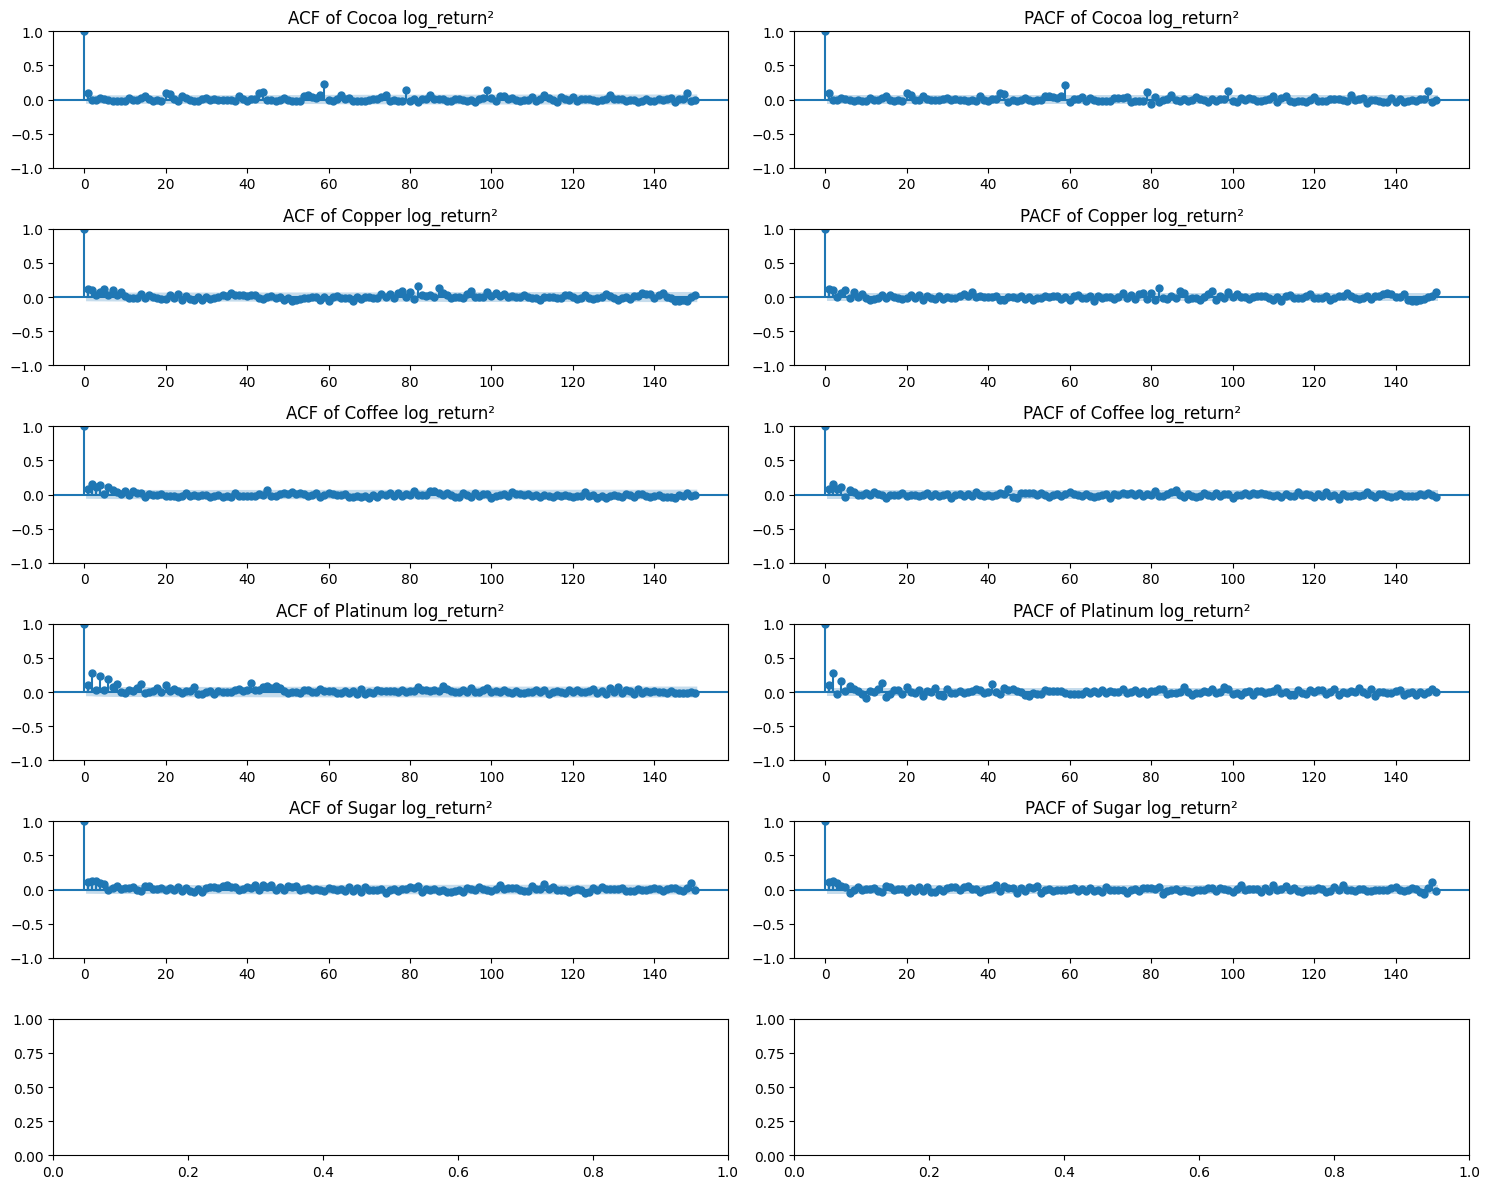

In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# log kare serisini oluştur
log_squared = log_returns ** 2
cols = log_squared.columns
n = len(cols)
rows = (n + 1) // 2  # 2 sütunlu grid

fig, axes = plt.subplots(rows * 2, 2, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    series = log_squared[col].dropna()
    
    # ACF plot
    plot_acf(series, ax=axes[2*i], lags=150)
    axes[2*i].set_title(f'ACF of {col} log_return²')
    
    # PACF plot
    plot_pacf(series, ax=axes[2*i + 1], lags=150, method='ywm')
    axes[2*i + 1].set_title(f'PACF of {col} log_return²')

# Layout ayarları
plt.tight_layout()

# Görseli kaydet
plt.savefig("log_squared_acf_pacf.png", dpi=300)

plt.show()


////////////////////////////////////////////////ARMA+ARCH//////////////////////////////////////////////////

In [35]:
log_returns

Ticker,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-03,-0.005148,-0.012253,-0.005918,0.006011,0.013616
2020-01-06,-0.013992,0.000714,-0.033806,-0.024784,0.031068
2020-01-07,0.019534,0.001249,0.002045,0.005814,-0.010249
2020-01-08,-0.012714,0.005335,-0.026911,-0.007273,-0.008869
2020-01-09,0.020970,-0.003020,-0.015222,0.008411,0.017660
...,...,...,...,...,...
2023-12-22,0.005349,-0.003332,-0.004141,0.012223,0.018601
2023-12-26,-0.006516,0.000000,0.008007,0.000612,-0.004374
2023-12-27,-0.000701,0.012247,0.017343,0.020201,0.003404


In [36]:
stationary_test(log_returns)

C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(series, regression='c', nlags=10)
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(series, regression='c', nlags=10)
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(series, regression='c', nlags=10)
C:\Users\ozdas\AppData\Local\Temp\ipykernel_15164\956476922.py:27: InterpolationWarning: The test statistic is outside of the range of p-value

,Series,ADF Statistic,ADF p-value,ADF Result,KPSS Statistic,KPSS p-value,KPSS Result,PP Statistic,PP p-value,PP Result
0,Cocoa,-20.548186,0.000000e+00,Stationary,0.283147,0.1,Stationary,-30.560838,0.0,Stationary
1,Copper,-11.045828,5.226344e-20,Stationary,0.154120,0.1,Stationary,-31.860907,0.0,Stationary
2,Coffee,-31.491617,0.000000e+00,Stationary,0.108756,0.1,Stationary,-31.706767,0.0,Stationary
3,Platinum,-14.871294,1.661819e-27,Stationary,0.037089,0.1,Stationary,-31.466037,0.0,Stationary
4,Sugar,-8.957504,8.396409e-15,Stationary,0.077717,0.1,Stationary,-31.251270,0.0,Stationary


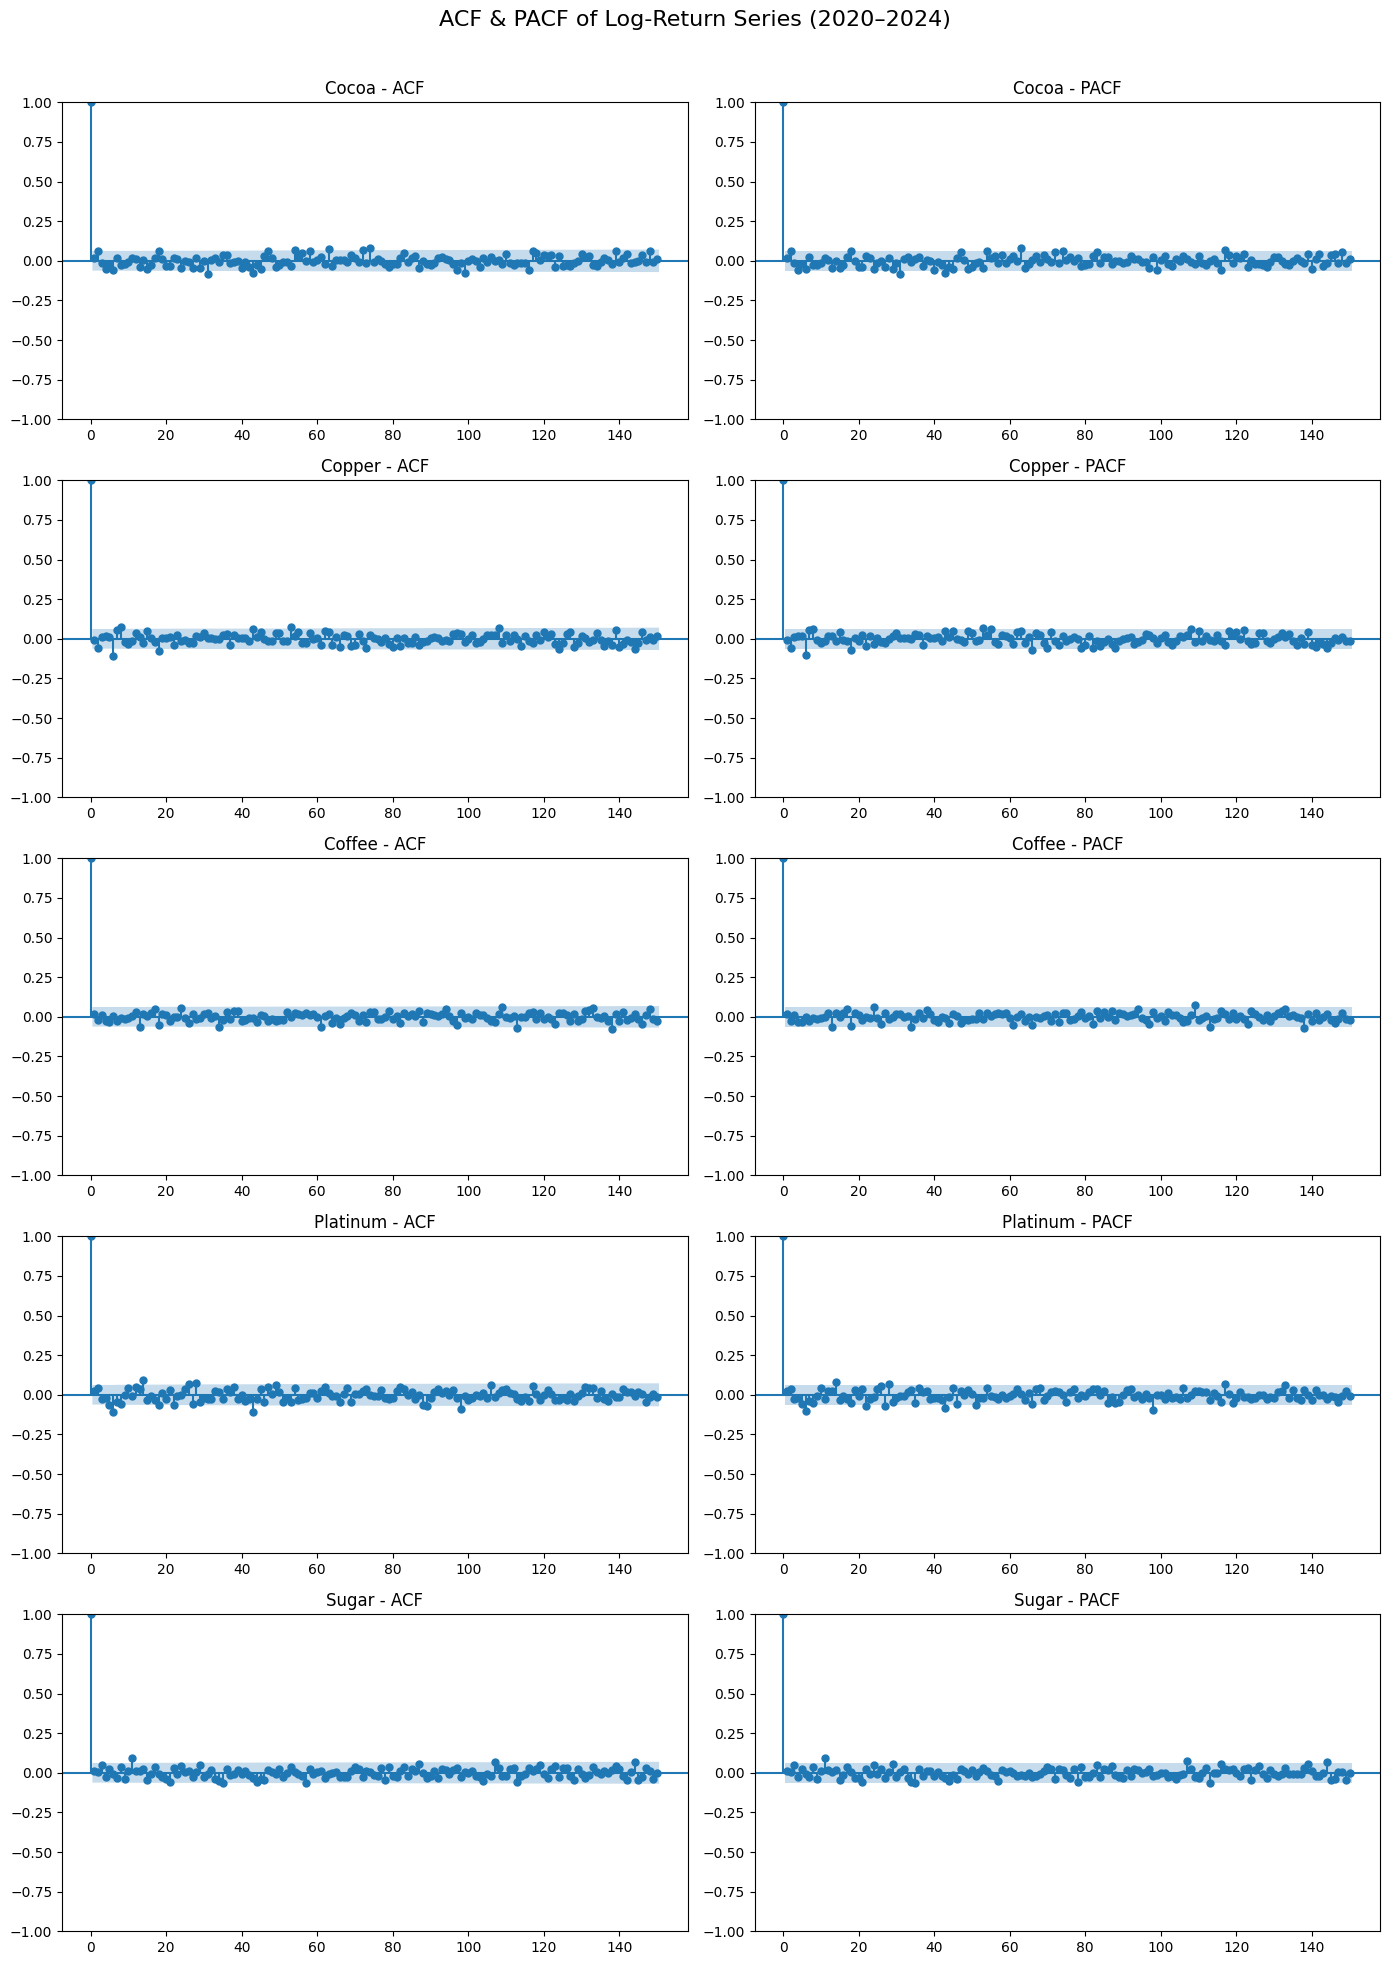

In [37]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cols = log_returns.columns
n = len(cols)

# Grafik alanı: her satır 1 değişken için, 2 sütun (ACF ve PACF)
fig, axes = plt.subplots(n, 2, figsize=(14, 4 * n))

# Eğer sadece 1 değişken varsa axes 1D olur, 2D yap
if n == 1:
    axes = [axes]

# Her değişken için ACF & PACF çiz
for i, col in enumerate(cols):
    plot_acf(log_returns[col].dropna(), ax=axes[i][0], lags=150)
    axes[i][0].set_title(f"{col} - ACF")

    plot_pacf(log_returns[col].dropna(), ax=axes[i][1], lags=150, method='ywm')
    axes[i][1].set_title(f"{col} - PACF")

# Genel başlık ve layout
fig.suptitle("ACF & PACF of Log-Return Series (2020–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Kaydet
plt.savefig("log_return_acf_pacf_combined.png", dpi=300)

plt.show()


In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# AIC sonuçlarını ve kalıntıları saklamak için yapılar
results = []
arma_log_return_residuals_df = pd.DataFrame()

# ARIMA parametre aralığı
p_range = range(0, 6)  # en az 1
d_range = range(0, 1)
q_range = range(0,6)  # en az 1

# Her sütun (emtia) için işlem yap
for col in log_returns.columns:
    series = log_returns[col].dropna() * 100
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(series, order=(p, d, q)).fit()
                    aic = model.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = model
                except:
                    continue

    if best_model is not None:
        results.append({
            'Commodity': col,
            'ARIMA Order (p,d,q)': best_order,
            'AIC': round(best_aic, 4)
        })

        # Residuals (kalıntı serisi)
        resid = best_model.resid
        arma_log_return_residuals_df[col] = resid
    else:
        results.append({
            'Commodity': col,
            'ARIMA Order (p,d,q)': 'ERROR',
            'AIC': None
        })

# Sonuçları tabloya dök
arima_results_df = pd.DataFrame(results).set_index('Commodity')

# Göster
print(arima_results_df)


          ARIMA Order (p,d,q)        AIC
Commodity                               
Cocoa               (1, 0, 3)  3958.1074
Copper              (2, 0, 2)  3718.7228
Coffee              (0, 0, 0)  4516.9793
Platinum            (4, 0, 4)  4364.9192
Sugar               (2, 0, 3)  4004.4055


In [39]:
arma_log_return_residuals_df

,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-03,-0.562692,-1.256873,-0.630940,0.579509,1.316587
2020-01-06,-1.438488,0.031157,-3.419707,-2.522219,3.049382
2020-01-07,1.961947,0.008691,0.165352,0.619685,-1.113058
2020-01-08,-1.274897,0.515277,-2.730222,-0.629816,-0.999395
2020-01-09,1.884966,-0.254472,-1.561336,0.799112,1.707546
...,...,...,...,...,...
2023-12-22,0.604571,-0.288631,-0.453186,0.956971,1.310526
2023-12-26,-0.533681,-0.258812,0.761623,-0.341723,-0.079548
2023-12-27,-0.028130,1.116759,1.695186,1.947220,0.388839


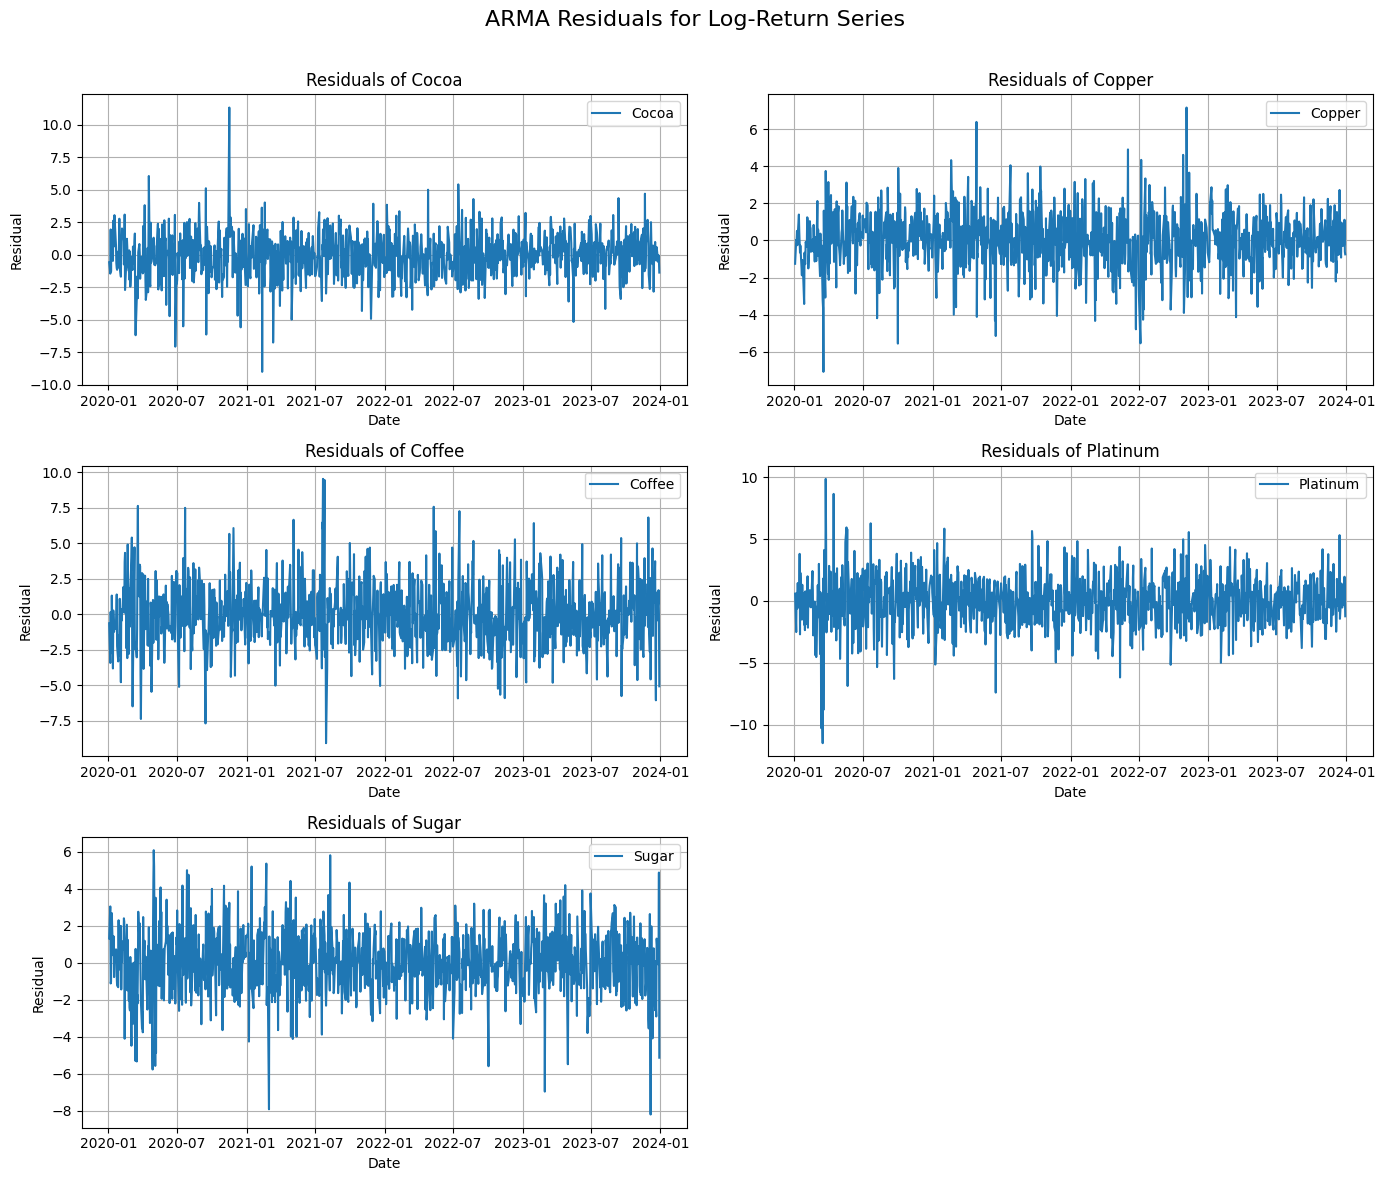

In [40]:
import matplotlib.pyplot as plt

# Sütun bilgilerini al
cols = arma_log_return_residuals_df.columns
n = len(cols)
rows = (n + 1) // 2  # 2 sütunlu subplot için kaç satır gerektiğini hesapla

# Şekil ayarları
fig, axes = plt.subplots(rows, 2, figsize=(14, 4 * rows))
axes = axes.flatten()

# Her sütunu ayrı subplot olarak çiz
for i, col in enumerate(cols):
    axes[i].plot(arma_log_return_residuals_df.index, arma_log_return_residuals_df[col], label=col, color='tab:blue')
    axes[i].set_title(f"Residuals of {col}", fontsize=12)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Residual")
    axes[i].grid(True)
    axes[i].legend()

# Kullanılmayan eksenleri kapat
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Genel başlık
fig.suptitle("ARMA Residuals for Log-Return Series", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Görseli kaydet
plt.savefig("arma_log_return_residuals.png", dpi=300)

plt.show()


In [41]:
from statsmodels.stats.diagnostic import het_arch
import pandas as pd

arch_test_results = []

for col in arma_log_return_residuals_df.columns:
    series = arma_log_return_residuals_df[col].dropna()
    lm_stat, pval, f_stat, f_pval = het_arch(series)
    result = "Yes" if pval < 0.05 else "No"

    arch_test_results.append({
        'Commodity': col,
        'LM Statistic': round(lm_stat, 4),
        'LM p-value': f"{pval:.4g}",
        'F Statistic': round(f_stat, 4),
        'F p-value': f"{f_pval:.4g}",
        'ARCH Effect': result
    })

arch_test_df = pd.DataFrame(arch_test_results).set_index("Commodity")

print("ARCH Effect Test (LM Test) Results:")
print(arch_test_df)


ARCH Effect Test (LM Test) Results:
           LM Statistic LM p-value  F Statistic  F p-value ARCH Effect
Commodity                                                             
Cocoa           10.8365     0.3704       1.0835     0.3718          No
Copper          37.6483  4.369e-05       3.8696  3.634e-05         Yes
Coffee          57.6361  1.012e-08       6.0504  5.714e-09         Yes
Platinum       115.6014  3.941e-20      12.9352  1.971e-21         Yes
Sugar           44.7289  2.434e-06       4.6316  1.809e-06         Yes


In [42]:
import pandas as pd
from arch import arch_model

# Assuming 'residuals_df' is your DataFrame containing residuals for each ARMA model
# Each column corresponds to a different residual series

# Settings
p_max = 5
q_max = 5

best_orders = {}
arch_resid_df = pd.DataFrame()

for col in arma_log_return_residuals_df.columns:
    series = arma_log_return_residuals_df[col].dropna()
    best_aic = float("inf")
    best_model = None
    best_pq = (0, 0)

    for p in range(p_max + 1):
        for q in range(q_max + 1):
            if p == 0 and q == 0:
                continue  # Skip ARCH(0)/GARCH(0,0)

            try:
                model = arch_model(series, vol='GARCH', p=p, q=q, mean='Zero', dist='normal')
                res = model.fit(disp="off")
                if res.aic < best_aic:
                    best_aic = res.aic
                    best_model = res
                    best_pq = (p, q)
            except Exception as e:
                continue

    if best_model is not None:
        best_orders[col] = {"p": best_pq[0], "q": best_pq[1], "aic": best_aic}
        arch_resid_df[col] = best_model.resid

# Print best orders
print("Best ARCH/GARCH orders and AIC for each series:")
for col, info in best_orders.items():
    print(f"{col}: GARCH({info['p']}, {info['q']}), AIC = {info['aic']:.4f}")

# Display residuals as DataFrame
print("\nARCH/GARCH model residuals:")
print(arch_resid_df.head())


Best ARCH/GARCH orders and AIC for each series:
Cocoa: GARCH(4, 5), AIC = 3926.5420
Copper: GARCH(2, 3), AIC = 3667.1081
Coffee: GARCH(2, 1), AIC = 4483.6197
Platinum: GARCH(1, 1), AIC = 4302.6299
Sugar: GARCH(1, 1), AIC = 3957.6858

ARCH/GARCH model residuals:
               Cocoa    Copper    Coffee  Platinum     Sugar
Date                                                        
2020-01-03 -0.562692 -1.256873 -0.630940  0.579509  1.316587
2020-01-06 -1.438488  0.031157 -3.419707 -2.522219  3.049382
2020-01-07  1.961947  0.008691  0.165352  0.619685 -1.113058
2020-01-08 -1.274897  0.515277 -2.730222 -0.629816 -0.999395
2020-01-09  1.884966 -0.254472 -1.561336  0.799112  1.707546


In [43]:
data

Ticker,Cocoa,Copper,Coffee,Platinum,Sugar
Date,,,,,
2020-01-02,2532.0,2.8330,127.099998,978.599976,13.130000
2020-01-03,2519.0,2.7985,126.349998,984.500000,13.310000
2020-01-06,2484.0,2.8005,122.150002,960.400024,13.730000
2020-01-07,2533.0,2.8040,122.400002,966.000000,13.590000
2020-01-08,2501.0,2.8190,119.150002,959.000000,13.470000
...,...,...,...,...,...
2023-12-22,4311.0,3.8955,192.800003,979.500000,20.620001
2023-12-26,4283.0,3.8955,194.350006,980.099976,20.530001
2023-12-27,4280.0,3.9435,197.750000,1000.099976,20.600000


(                    sumsquare_error          aic          bic  kl_div  \
 genhyperbolic              0.005572  1010.485828  1035.049542     inf   
 gennorm                    0.005545  1013.260791  1027.999019     inf   
 hypsecant                  0.006532  1001.587131  1011.412617     inf   
 tukeylambda                0.007138  1007.581238  1022.319466     inf   
 norminvgauss               0.006603  1007.062594  1026.713565     inf   
 t                          0.007573  1009.468639  1024.206868     inf   
 johnsonsu                  0.006957  1008.640759  1028.291730     inf   
 laplace_asymmetric         0.007500   969.940714   984.678943     inf   
 nct                        0.007335  1012.093996  1031.744968     inf   
 loglaplace                 0.006948   971.719922   986.458150     inf   
 logistic                   0.008060  1033.820934  1043.646420     inf   
 burr12                     0.007419  1030.085928  1049.736899     inf   
 burr                       0.007668  

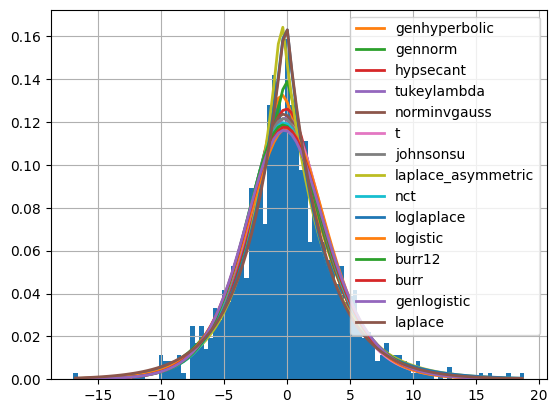

In [44]:
from fitter import Fitter
f = Fitter(residuals_df["Coffee"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error         aic         bic  kl_div  ks_statistic  \
 genhyperbolic         0.022803  844.397242  868.960956     inf      0.010729   
 mielke                0.023469  842.128497  861.779468     inf      0.013462   
 norminvgauss          0.023304  842.300131  861.951102     inf      0.013863   
 genlogistic           0.023363  840.600680  855.338908     inf      0.014207   
 fisk                  0.023617  835.706721  850.444949     inf      0.014265   
 johnsonsu             0.023451  843.016819  862.667790     inf      0.014768   
 nct                   0.023642  844.400184  864.051156     inf      0.015760   
 gennorm               0.025143  841.975620  856.713849     inf      0.019392   
 logistic              0.025372  830.926321  840.751807     inf      0.019539   
 tukeylambda           0.025433  836.960595  851.698823     inf      0.020691   
 t                     0.025692  839.475460  854.213688     inf      0.022383   
 vonmises_line         0.025

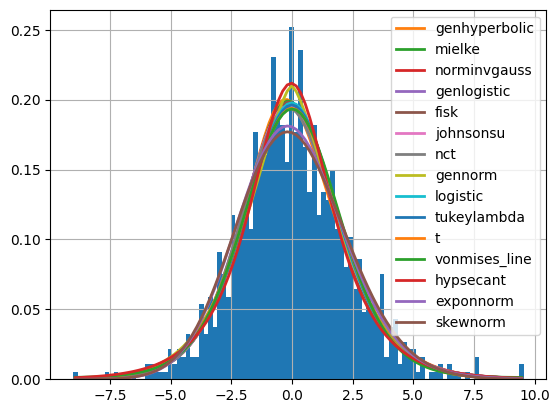

In [45]:
f = Fitter(arch_df["Coffee"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error         aic         bic  kl_div  ks_statistic  \
 genhyperbolic         0.022805  844.498637  869.062351     inf      0.010803   
 norminvgauss          0.023304  842.299793  861.950764     inf      0.013862   
 mielke                0.023554  836.929741  856.580712     inf      0.014220   
 johnsonsu             0.023451  843.017927  862.668898     inf      0.014768   
 nct                   0.023642  844.400569  864.051540     inf      0.015761   
 logistic              0.025372  830.926321  840.751807     inf      0.019539   
 t                     0.025692  839.475210  854.213439     inf      0.022384   
 vonmises_line         0.025939  818.539120  833.277349     inf      0.023473   
 exponnorm             0.026966  893.565446  908.303674     inf      0.024623   
 skewnorm              0.028863  907.853785  922.592013     inf      0.027119   
 recipinvgauss         0.029516  925.853289  940.591517     inf      0.027519   
 fatiguelife           0.030

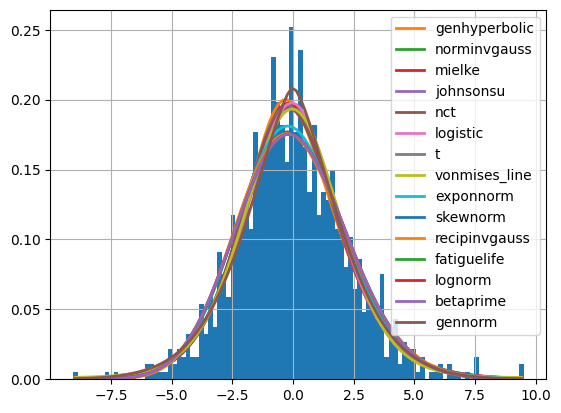

In [46]:
f = Fitter(arma_log_return_residuals_df["Coffee"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error         aic         bic  kl_div  ks_statistic  \
 genhyperbolic         0.022805  844.498637  869.062351     inf      0.010803   
 norminvgauss          0.023304  842.299793  861.950764     inf      0.013862   
 mielke                0.023554  836.929741  856.580712     inf      0.014220   
 johnsonsu             0.023451  843.017927  862.668898     inf      0.014768   
 nct                   0.023642  844.400569  864.051540     inf      0.015761   
 logistic              0.025372  830.926321  840.751807     inf      0.019539   
 t                     0.025692  839.475210  854.213439     inf      0.022384   
 vonmises_line         0.025939  818.539120  833.277349     inf      0.023473   
 exponnorm             0.026966  893.565446  908.303674     inf      0.024623   
 skewnorm              0.028863  907.853785  922.592013     inf      0.027119   
 recipinvgauss         0.029516  925.853289  940.591517     inf      0.027519   
 fatiguelife           0.030

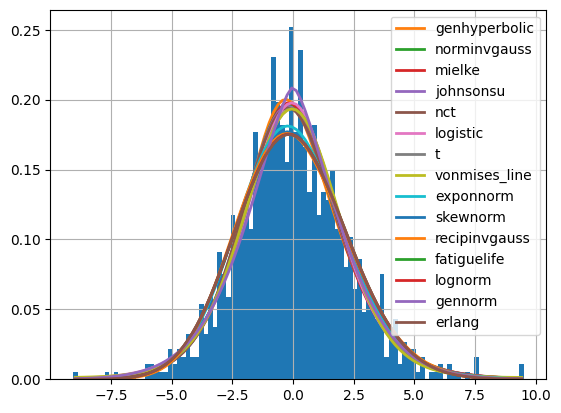

In [47]:
f = Fitter(arch_resid_df["Coffee"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error          aic          bic  kl_div  \
 logistic              0.000040  1718.384789  1728.210275     inf   
 genlogistic           0.000039  1730.553472  1745.291701     inf   
 genhyperbolic         0.000039  1699.530993  1724.094707     inf   
 norminvgauss          0.000040  1716.566522  1736.217493     inf   
 vonmises_line         0.000041  1776.890351  1791.628580     inf   
 t                     0.000040  1674.419063  1689.157291     inf   
 nct                   0.000041  1676.342028  1695.992999     inf   
 tukeylambda           0.000042  1678.448514  1693.186742     inf   
 crystalball           0.000040  2009.711743  2029.362714     inf   
 gennorm               0.000046  1737.116421  1751.854649     inf   
 dweibull              0.000068  1709.268157  1724.006386     inf   
 hypsecant             0.000048  1654.236597  1664.062082     inf   
 skewnorm              0.000048  2080.695731  2095.433960     inf   
 powernorm             0.000048  2

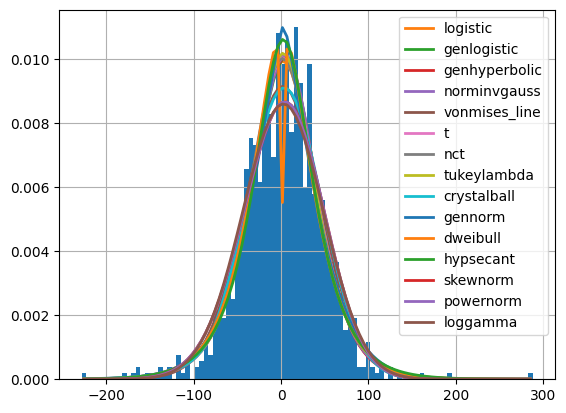

In [48]:
f = Fitter(residuals_df["Cocoa"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error          aic          bic  kl_div  \
 burr12                0.021866  1167.246542  1186.897513     inf   
 burr                  0.022461  1124.527069  1144.178040     inf   
 genlogistic           0.022515  1137.444087  1152.182315     inf   
 nct                   0.022170  1100.792506  1120.443478     inf   
 johnsonsu             0.022321  1112.334261  1131.985232     inf   
 norminvgauss          0.022591  1132.798973  1152.449944     inf   
 genhyperbolic         0.022500  1107.995614  1132.559328     inf   
 logistic              0.023852  1121.030112  1130.855598     inf   
 t                     0.023876  1074.469926  1089.208155     inf   
 gennorm               0.027037  1157.935930  1172.674159     inf   
 vonmises_line         0.024663  1212.218900  1226.957129     inf   
 crystalball           0.023898  1481.717528  1501.368499     inf   
 tukeylambda           0.024360  1078.794137  1093.532365     inf   
 powerlognorm          0.027889  1

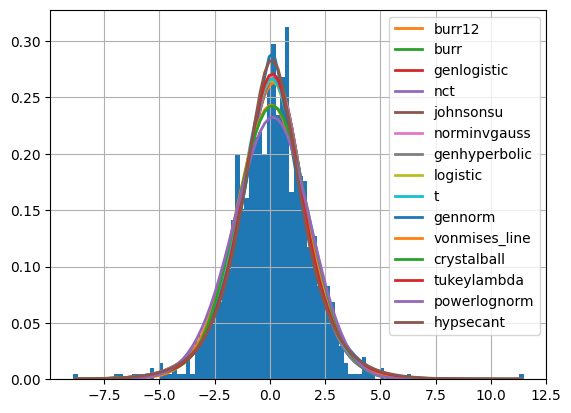

In [49]:
f = Fitter(arch_df["Cocoa"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error          aic          bic  kl_div  \
 norminvgauss          0.016484  1139.785433  1159.436404     inf   
 genlogistic           0.016628  1136.926661  1151.664890     inf   
 johnsonsu             0.016147  1118.164885  1137.815856     inf   
 nct                   0.015978  1105.843306  1125.494277     inf   
 genhyperbolic         0.016498  1113.684348  1138.248062     inf   
 logistic              0.018506  1119.955878  1129.781364     inf   
 fisk                  0.018492  1122.203183  1136.941411     inf   
 t                     0.018427  1078.206489  1092.944718     inf   
 vonmises_line         0.018231  1211.574725  1226.312953     inf   
 burr                  0.018322  1093.605434  1113.256405     inf   
 crystalball           0.017333  1474.069326  1493.720298     inf   
 gennorm               0.023345  1168.231685  1182.969914     inf   
 hypsecant             0.024120  1046.328906  1056.154391     inf   
 dweibull              0.021336  1

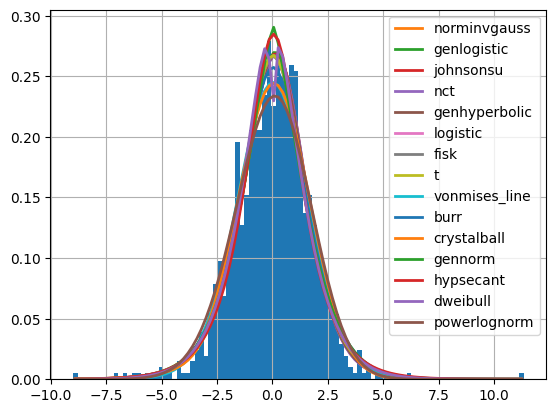

In [50]:
f = Fitter(arch_resid_df["Cocoa"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error          aic          bic  kl_div  \
 norminvgauss          0.016484  1139.785433  1159.436404     inf   
 genlogistic           0.016628  1136.926661  1151.664890     inf   
 johnsonsu             0.016147  1118.164885  1137.815856     inf   
 nct                   0.015978  1105.843306  1125.494277     inf   
 genhyperbolic         0.016498  1113.684348  1138.248062     inf   
 logistic              0.018506  1119.955878  1129.781364     inf   
 fisk                  0.018492  1122.203183  1136.941411     inf   
 t                     0.018427  1078.206489  1092.944718     inf   
 burr                  0.018322  1093.605434  1113.256405     inf   
 crystalball           0.017333  1474.069326  1493.720298     inf   
 gennorm               0.023345  1168.231685  1182.969914     inf   
 hypsecant             0.024120  1046.328906  1056.154391     inf   
 dweibull              0.021336  1127.554324  1142.292553     inf   
 tukeylambda           0.020721  1

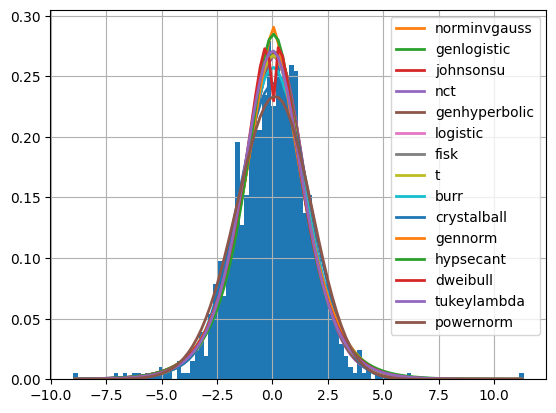

In [51]:
f = Fitter(arma_log_return_residuals_df["Cocoa"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error          aic          bic  kl_div  \
 t                     0.021203   994.785859  1009.524087     inf   
 vonmises_line         0.020327  1026.215186  1040.953415     inf   
 johnsonsu             0.021142   998.974282  1018.625253     inf   
 logistic              0.021707   999.037674  1008.863160     inf   
 norminvgauss          0.021278  1005.138344  1024.789315     inf   
 genlogistic           0.021625   996.459713  1011.197942     inf   
 mielke                0.021564   994.474726  1014.125697     inf   
 dweibull              0.025943   995.964198  1010.702426     inf   
 burr                  0.021807  1001.172751  1020.823722     inf   
 tukeylambda           0.022130   992.978013  1007.716242     inf   
 rice                  0.023658  1213.474367  1228.212595     inf   
 lognorm               0.023553  1220.986456  1235.724685     inf   
 crystalball           0.021036  1076.908796  1096.559767     inf   
 gennorm               0.023401  1

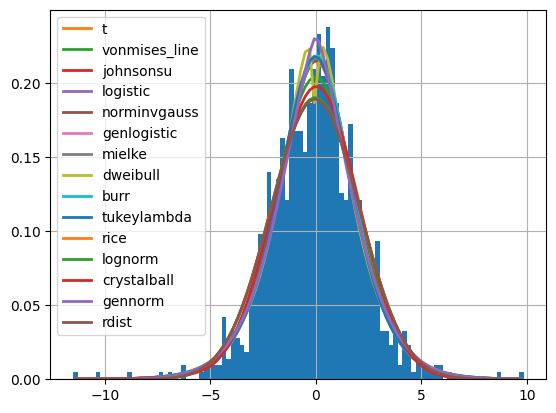

In [52]:
f = Fitter(arma_log_return_residuals_df["Platinum"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error          aic          bic  kl_div  \
 nct                   0.000375  1268.747786  1288.398758     inf   
 johnsonsu             0.000375  1268.124302  1287.775274     inf   
 dweibull              0.000402  1260.656969  1275.395198     inf   
 genlogistic           0.000387  1254.941338  1269.679566     inf   
 vonmises_line         0.000380  1252.562792  1267.301021     inf   
 nakagami              0.000422  1332.378163  1347.116391     inf   
 exponnorm             0.000421  1331.811666  1346.549894     inf   
 truncnorm             0.000421  1333.811174  1353.462145     inf   
 norm                  0.000421  1329.811174  1339.636660     inf   
 fatiguelife           0.000423  1339.652044  1354.390273     inf   
 logistic              0.000391  1256.864854  1266.690339     inf   
 gennorm               0.000402  1276.641432  1291.379660     inf   
 dgamma                0.000450  1242.946386  1257.684614     inf   
 erlang                0.000438  1

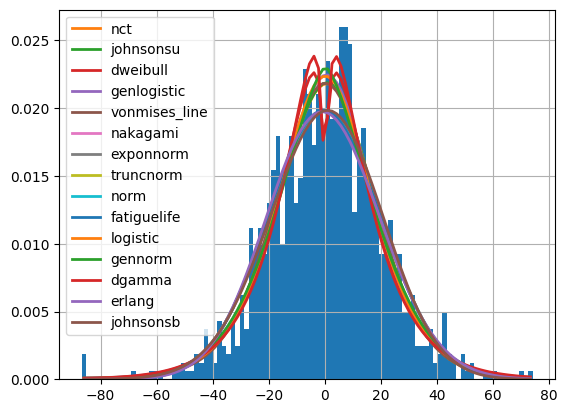

In [53]:
f = Fitter(residuals_df["Platinum"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(              sumsquare_error          aic          bic  kl_div  ks_statistic  \
 burr12               0.019782  1090.649169  1110.300140     inf      0.021062   
 genlogistic          0.020149  1078.617126  1093.355355     inf      0.021817   
 norminvgauss         0.020466  1069.473980  1089.124951     inf      0.022291   
 johnsonsu            0.020205  1059.779461  1079.430432     inf      0.022301   
 logistic             0.020433  1084.566559  1094.392045     inf      0.024197   
 dweibull             0.026418  1088.497510  1103.235739     inf      0.024235   
 t                    0.020417  1052.862032  1067.600260     inf      0.024528   
 dgamma               0.035768  1044.430310  1059.168539     inf      0.025870   
 gennorm              0.025313  1113.309475  1128.047704     inf      0.026727   
 crystalball          0.020397  1197.106095  1216.757067     inf      0.028210   
 exponnorm            0.023780  1341.496689  1356.234917     inf      0.028774   
 tukeylambda    

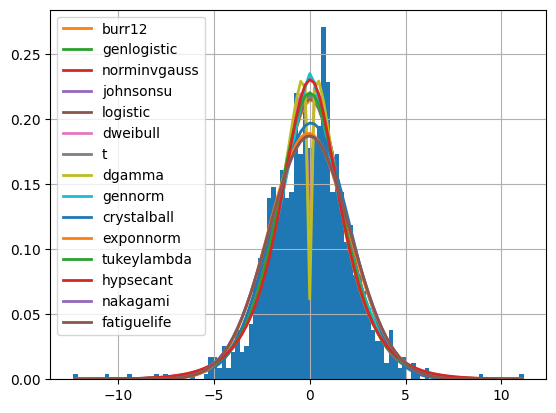

In [54]:
f = Fitter(arch_df["Platinum"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(              sumsquare_error          aic          bic  kl_div  ks_statistic  \
 t                    0.021203   994.785859  1009.524087     inf      0.017517   
 nct                  0.021017   995.198276  1014.849248     inf      0.018038   
 johnsonsu            0.021142   998.974282  1018.625253     inf      0.018389   
 logistic             0.021707   999.037674  1008.863160     inf      0.018457   
 norminvgauss         0.021278  1005.138344  1024.789315     inf      0.018607   
 genlogistic          0.021625   996.459713  1011.197942     inf      0.019359   
 mielke               0.021564   994.474726  1014.125697     inf      0.019883   
 dweibull             0.025943   995.964198  1010.702426     inf      0.021210   
 burr                 0.021807  1001.172751  1020.823722     inf      0.021299   
 rice                 0.023658  1213.474367  1228.212595     inf      0.024050   
 lognorm              0.023553  1220.986456  1235.724685     inf      0.024094   
 crystalball    

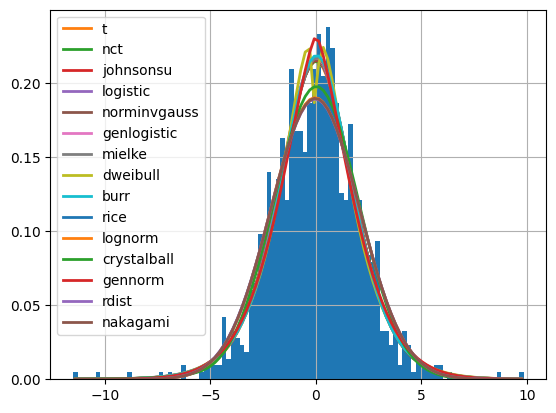

In [55]:
f = Fitter(arch_resid_df["Platinum"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(              sumsquare_error         aic         bic  kl_div  ks_statistic  \
 t                    1.577400  594.453943  609.192172     inf      0.017128   
 burr12               1.602214  606.205003  625.855974     inf      0.017134   
 johnsonsu            1.595522  596.073611  615.724582     inf      0.017502   
 logistic             1.591121  610.489898  620.315383     inf      0.017844   
 norminvgauss         1.608770  602.364277  622.015249     inf      0.018024   
 genlogistic          1.608812  601.176044  615.914272     inf      0.018259   
 gennorm              1.679013  643.100766  657.838994     inf      0.020702   
 crystalball          1.603582  583.266612  602.917583     inf      0.022894   
 dweibull             2.117159  593.695220  608.433449     inf      0.027011   
 hypsecant            1.792176  561.447808  571.273293     inf      0.027427   
 vonmises             1.672170  765.345346  780.083574     inf      0.027472   
 fatiguelife          1.745520  859.6225

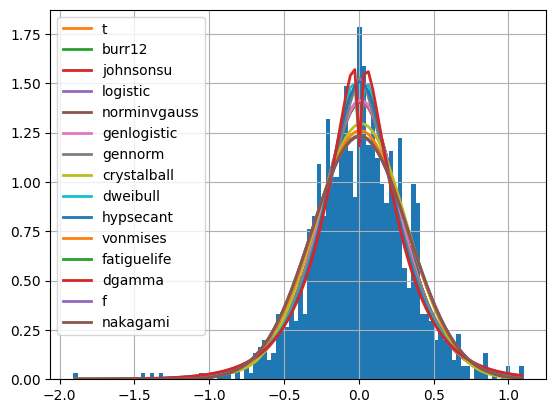

In [56]:
f = Fitter(residuals_df["Sugar"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(              sumsquare_error         aic         bic  kl_div  ks_statistic  \
 johnsonsu            0.055901  802.875280  822.526251     inf      0.023224   
 t                    0.054943  804.222659  818.960888     inf      0.023542   
 norminvgauss         0.056285  803.504327  823.155298     inf      0.023566   
 crystalball          0.053810  812.604761  832.255732     inf      0.023918   
 logistic             0.056653  796.201330  806.026816     inf      0.026204   
 genlogistic          0.057478  793.368573  808.106801     inf      0.026517   
 gennorm              0.058439  815.542486  830.280715     inf      0.027660   
 powernorm            0.058794  859.219593  873.957822     inf      0.029253   
 skewnorm             0.058595  861.101312  875.839541     inf      0.029367   
 johnsonsb            0.058576  873.195137  892.846108     inf      0.029640   
 loggamma             0.058901  864.242656  878.980884     inf      0.029730   
 pearson3             0.058709  868.5721

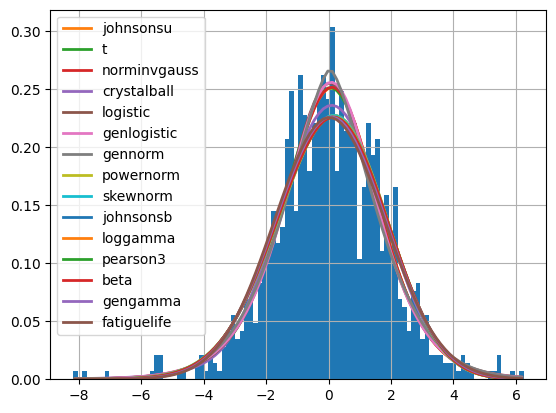

In [57]:
f = Fitter(arch_df["Sugar"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(              sumsquare_error         aic         bic  kl_div  ks_statistic  \
 johnsonsu            0.059422  801.047351  820.698322     inf      0.021289   
 norminvgauss         0.059794  801.798987  821.449958     inf      0.021450   
 gennorm              0.061331  814.115927  828.854155     inf      0.022608   
 mielke               0.065486  821.819505  841.470476     inf      0.023623   
 logistic             0.060824  792.142950  801.968436     inf      0.023662   
 genlogistic          0.060759  794.151589  808.889818     inf      0.024561   
 crystalball          0.057266  806.342827  825.993798     inf      0.025681   
 lognorm              0.060279  896.522140  911.260369     inf      0.026045   
 exponweib            0.060639  856.739414  876.390385     inf      0.026144   
 pearson3             0.061847  864.145067  878.883296     inf      0.027325   
 johnsonsb            0.061930  867.041641  886.692612     inf      0.027906   
 skewnorm             0.061769  857.0516

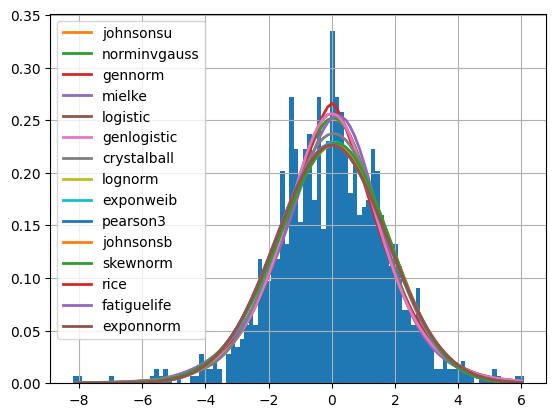

In [58]:
f = Fitter(arma_log_return_residuals_df["Sugar"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

(               sumsquare_error         aic         bic  kl_div  ks_statistic  \
 vonmises_line         0.057292  793.608916  808.347144     inf      0.018712   
 t                     0.058730  801.656516  816.394745     inf      0.021082   
 johnsonsu             0.059422  801.047351  820.698322     inf      0.021289   
 norminvgauss          0.059794  801.798987  821.449958     inf      0.021450   
 gennorm               0.061331  814.115927  828.854155     inf      0.022608   
 mielke                0.065486  821.819505  841.470476     inf      0.023623   
 logistic              0.060824  792.142950  801.968436     inf      0.023662   
 burr                  0.061909  790.542999  810.193971     inf      0.023896   
 genlogistic           0.060759  794.151589  808.889818     inf      0.024561   
 crystalball           0.057266  806.342827  825.993798     inf      0.025681   
 lognorm               0.060279  896.522140  911.260369     inf      0.026045   
 beta                  0.061

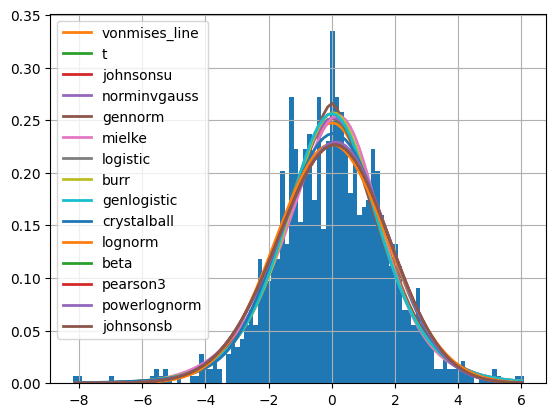

In [59]:
f = Fitter(arch_resid_df["Sugar"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

In [ ]:
f = Fitter(arch_df["Copper"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

In [ ]:
f = Fitter(arma_log_return_residuals_df["Copper"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

In [ ]:
f = Fitter(arch_resid_df["Copper"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

In [ ]:
f = Fitter(residuals_df["Copper"])
f.fit()
f.summary(Nbest=15,method="ks_statistic"),

In [ ]:
log_returns

In [ ]:
arma_log_return_residuals_df

In [60]:
data["Sugar"]

Date
2020-01-02    13.130000
2020-01-03    13.310000
2020-01-06    13.730000
2020-01-07    13.590000
2020-01-08    13.470000
                ...    
2023-12-22    20.620001
2023-12-26    20.530001
2023-12-27    20.600000
2023-12-28    21.760000
2023-12-29    20.580000
Name: Sugar, Length: 1006, dtype: float64